# LAB 1 - January 22, 2019 'EXPLORING DIGITAL SAMPLING, FOURIER TRANSFORMS, and both DSB and SSB mixers


Lets begin by importing packages

In [80]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from astropy import units as u, constants as c
import ugradio

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import cmath

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from pylab import rcParams
rcParams["axes.linewidth"]  = 2
rcParams["font.size"]  = 14

%config InlineBackend.figure_format = 'retina'

#Tick formatting
from matplotlib.ticker import MultipleLocator

# Figure Insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import matplotlib as mpl
#mpl.style.use('seaborn')

This code cell will import all the data that we need for our plotting purposes as well as for when we calculate the DFT, Power and Voltage spectrums.

In [57]:
data1 = np.load('data1.npy')/6.2 -42
data2 = np.load('data2.npy')/6.2 -42
data3 = np.load('data3.npy')/6.2 -42
data4 = np.load('data4.npy')/6.2 -42
data5 = np.load('data5.npy')/6.2 -42
data6 = np.load('data6.npy')/6.2 -42
data7 = np.load('data7.npy')/6.2 -42
data8 = np.load('data8.npy')/6.2 -42
data9 = np.load('data9.npy')/6.2 -42

data = np.load('all_data.npy')
#data = np.vstack((data1, data2, data3, data4, data5, data6, data7, data8, data9))

Now we can begin by defining a sampling frequency 

Frequency has units of s⁻¹ so to get the time in between measurements we need to take the inverse of the sampling frequency to get how long it takes between successive measurements. from this we can create an array of times

# 4.2 TEST PLOTTING CODE

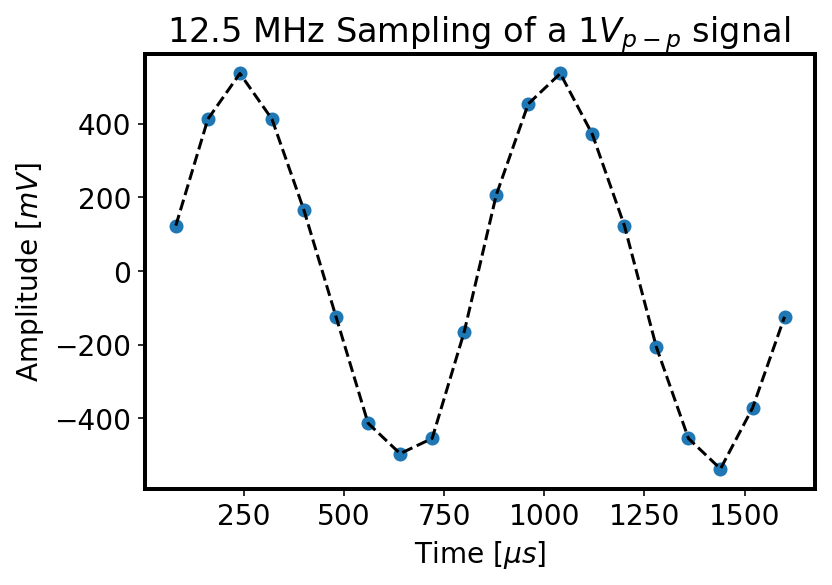

In [58]:
#the actual code to plot the data here I used the first 20 sample times
sampling_frequency = 12.5e6

#in the time_data1 variable I divided the time by 1e⁻9 so that the time 
#in the array is now in nanoseconds
time_data1 = (1/sampling_frequency) * np.arange(1, 1601, 1) * (1/1e-9)

plt.plot(time_data1[:20], data1[:20], 'o')
plt.plot(time_data1[:20], data1[:20], 'k--')
plt.ylabel(r'Amplitude $[mV]$')
plt.xlabel(r'Time $[\mu s]$')
plt.title(r'$12.5$ MHz Sampling of a $1 V_{p-p}$ signal ')
plt.show()

## 4.2 The Nyquist Criterion 

Plotting Data Voltage vs Time.
Given that the sampling frequency is fixed we can use this time between
measurments as constant since all we are changing is the signal frequency
not the sampling frequency we simply take the inverse to find how many
seconds between measurements and multiply it by an array going from 
1 to 16000

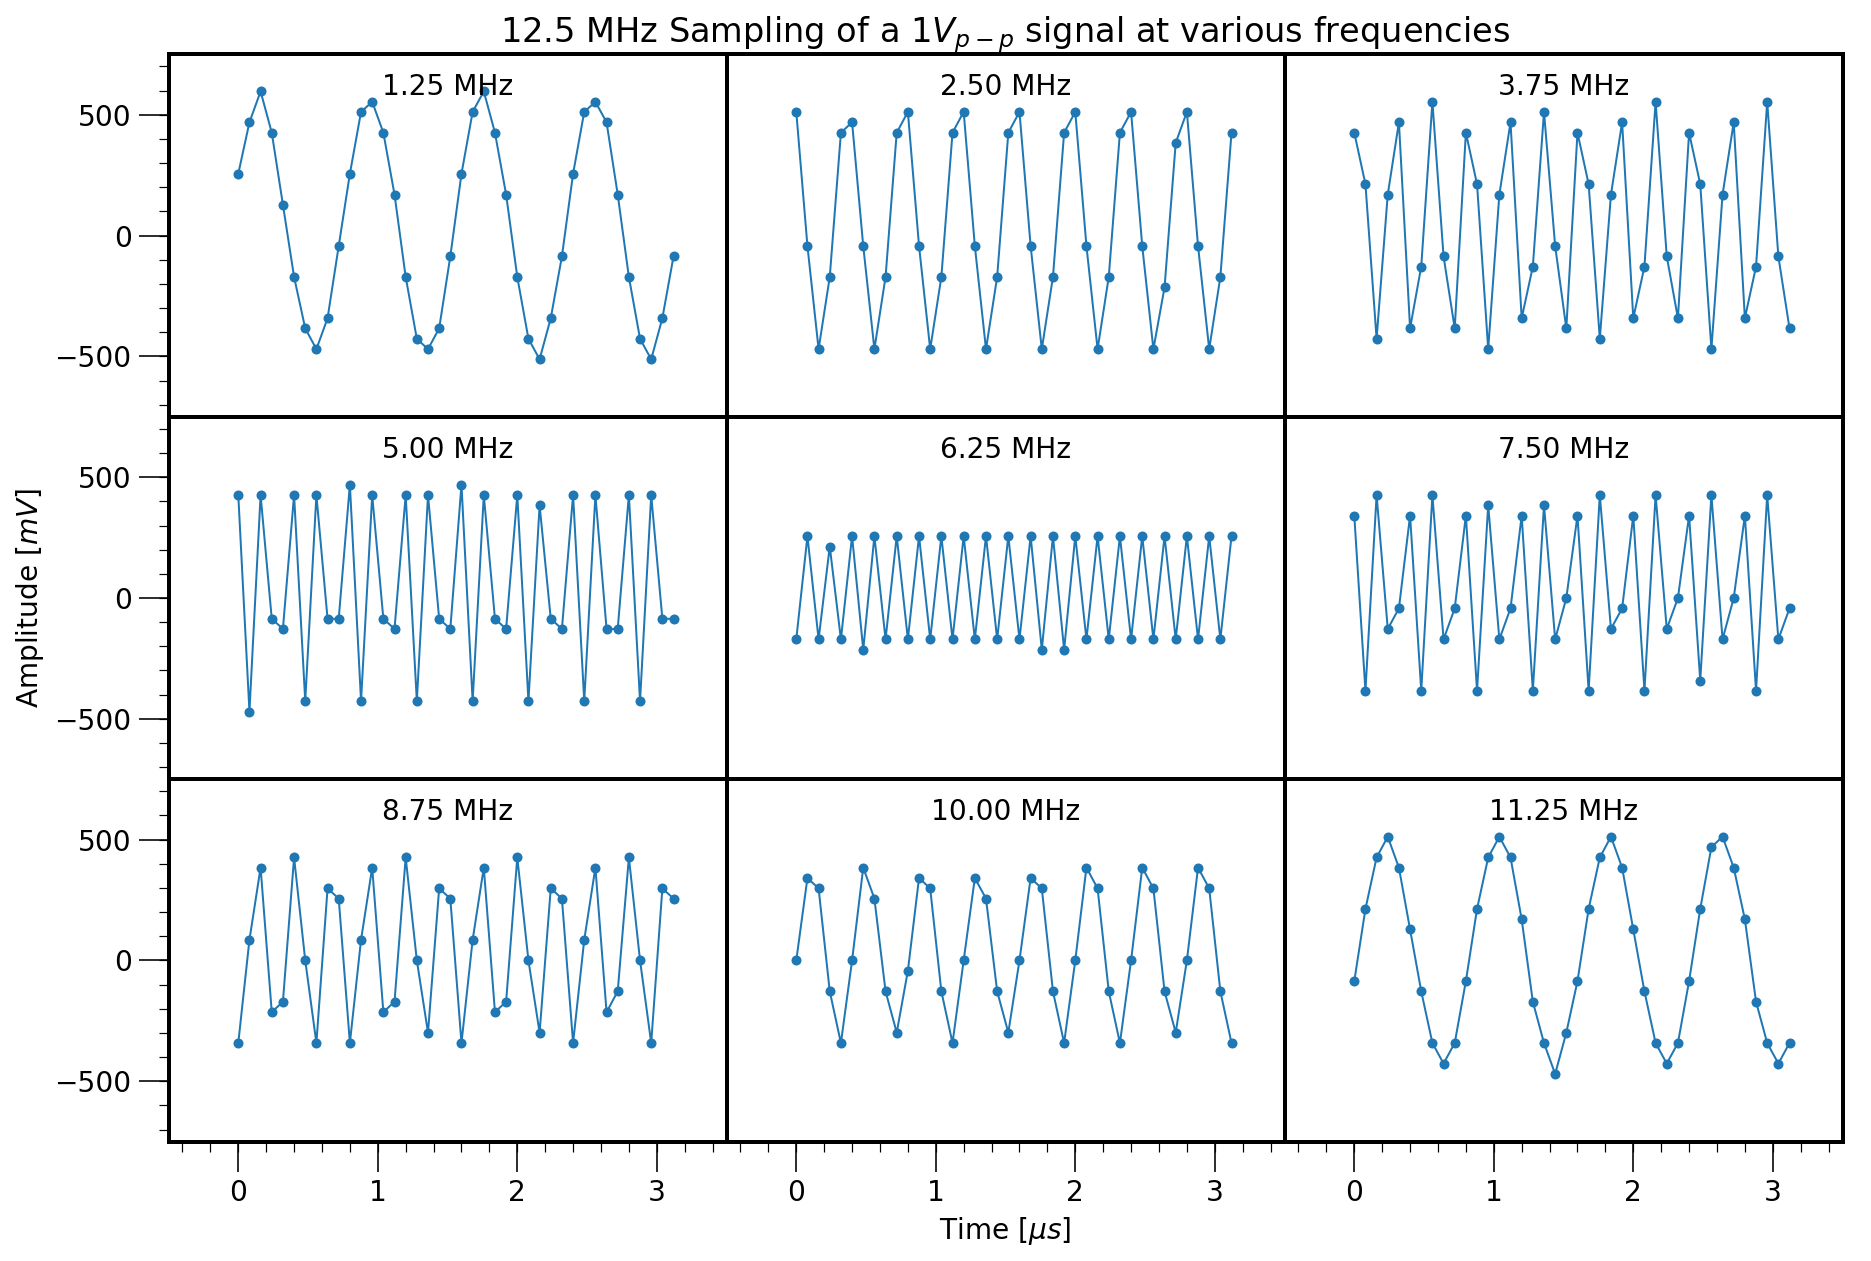

In [59]:
divisor = 5
sample_freq = (62.5 / divisor) * u.MHz 
dt = (1 / sample_freq).to(u.ns)

N_samples = 16000

times = np.arange(0,N_samples) * dt.to(u.us)
freqs_to_test = np.arange(.1,1.1,.1) * sample_freq

# Plot
fig, axes = plt.subplots(3,3, figsize = (15,10))
for i, ax in enumerate(axes.reshape(-1)):
    ax.plot(times[0:40 ],
            data[i][40:80]/6,
            #color = 'black',
            marker='o',
            #markerfacecolor='white',
            markersize = 4,
            linewidth = 1)
    
    ax.text(0.5, 0.91,
            '%.2f MHz' %freqs_to_test[i].value,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes),
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-.5, 3.5)
    ax.set_ylim(-750, 750)
    
    
    if (i % 3) == 0:
        ax.yaxis.set_major_locator(MultipleLocator(500))
        ax.yaxis.set_minor_locator(MultipleLocator(100)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
    if i > 5:
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.xaxis.set_minor_locator(MultipleLocator(0.2))
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
    if i == 3:
        ax.set_ylabel(r'Amplitude $[mV]$')
    if i == 7:
        ax.set_xlabel(r'Time $[\mu s]$')
    if i == 1:
        ax.set_title(r'$12.5$ MHz Sampling of a $1 V_{p-p}$ signal at various frequencies ')

plt.subplots_adjust(hspace=0, wspace = 0)
plt.show()
fig.savefig('time_series.pdf', dpi = 'figure', format = 'pdf', transparent = True)

# 4.3 Fourier Voltage and Power Spectra (5.2, 5.3)


Using the below code cells to work on the fft/dft

Suggestions: make N even(a power of two) I say we can use N = 128

In the documentation for the dft function we need to specify xt which is the function we have in the fourier transform this is eqn. 1 in section 5. I believe all that we have to do is multiply the voltages or electric field by the complex exponential term.

-The time range is another parameter we need to input and for that we need to make an array that has len 32 and make sure to make the starting point (-N/(2v_samp)) to ((N/2)-1)/(v_samp) with N = 128 and v_samp = 12.5MHz

-There is also an output frequency that we have to specify in the function and for that we have to calculate the first N frequencies running from -v_samp/2 to v_samp/2(1-(2/N)). Again here v_samp = 12.5MHz and N = 128


In [60]:
N = 2**7
#print(N)
firstN_data1 = data1[:N]

Making the time array

In [61]:
sampling_freq = 12.5e6
start_time = -(N/2)/sampling_freq
end_time = ((N/2) - 1)/sampling_freq
time_array = np.linspace(start_time, end_time, num = N)
#print(time_array)

Making the frequency array 

In [62]:
sampling_freq = 12.5e6
starting_freq = -sampling_freq/2
ending_freq = (sampling_freq/2)*(1-(2/N))
freq_arr = np.linspace(starting_freq, ending_freq, num = N)

Testing out the dft function

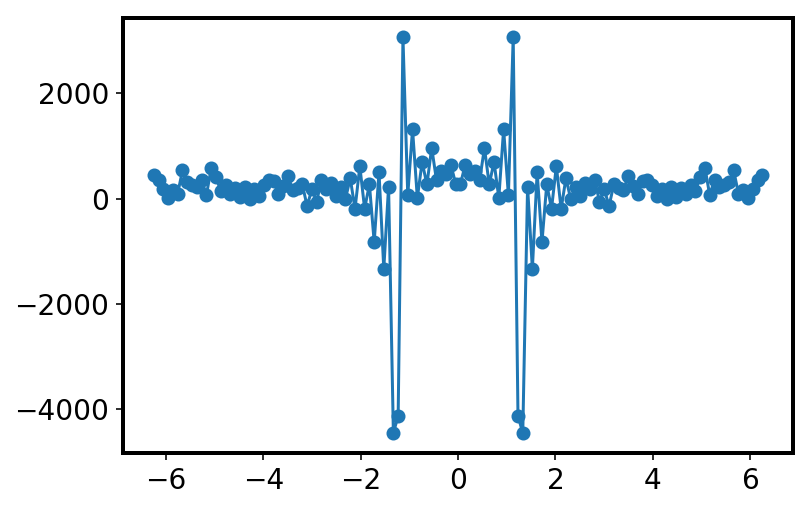

In [63]:
#test
fft_test = ugradio.dft.dft(firstN_data1, t = time_array, f = freq_arr)
#print(fft_test)

plt.plot(fft_test[0]/(1e6), fft_test[1], '-o')

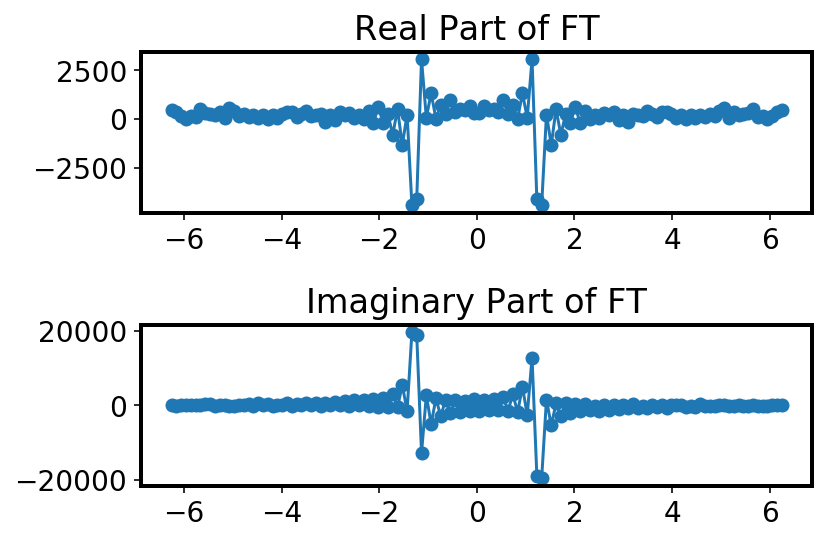

In [64]:
plt.subplot(211)
plt.title('Real Part of FT')
plt.plot(fft_test[0]/1e6, fft_test[1].real, '-o')
plt.subplot(212)
plt.title('Imaginary Part of FT')
plt.plot(fft_test[0]/1e6, fft_test[1].imag, '-o')
plt.tight_layout()

Making Power Spectrum for data 1

In [65]:
N = 2**7
#print(N)
sampling_freq = 12.5e6
start_time = -(N/2)/sampling_freq
end_time = ((N/2) - 1)/sampling_freq
time_array = np.linspace(start_time, end_time, num = N)

starting_freq = -sampling_freq/2
ending_freq = (sampling_freq/2)*(1-(2/N))
freq_arr = np.linspace(starting_freq, ending_freq, num = N)



In [81]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

    
def f(i):
    #firstN_data1 = data1[:N]
    fft_data1 = ugradio.dft.dft(data[i][:N], t = time_array, f = freq_arr)

    power_spec = np.abs(fft_data1[1])**2

    fig = plt.figure(figsize = (10,10))
    ax3 = fig.add_subplot(311)
    ax1 = fig.add_subplot(312)
    ax2 = fig.add_subplot(313, sharex = ax1)


    ax3.set_title('Power Spectrum of Data '+ str(i+1))
    ax3.set_ylabel('Power [w]', fontsize = 15)
    ax3.set_xlabel(r'$\nu$ (MHz)', fontsize = 15)
    ax3.stem(fft_data1[0]/1e6, power_spec, '-o')
    #ax3.set_ylim((0,7e8))


    ax1.set_title('Real Part of Data '+str(i+1)+' FT')
    ax1.set_xlabel(r'$\nu$ (MHz)', fontsize = 15)
    ax1.set_ylabel('Voltage (mV*s)', fontsize = 15)
    ax1.stem(fft_data1[0]/1e6, fft_data1[1].real, '-o')
    #ax1.set_ylim((-2e4,2e4))
    

    ax2.set_title('Imaginary Part of Data '+ str(i+1)+' FT')
    ax2.set_ylabel('Voltage (mV*s)', fontsize = 15)
    ax2.set_xlabel(r'$\nu$ (MHz)', fontsize = 15)           
    ax2.stem(fft_data1[0]/1e6, fft_data1[1].imag, '-o')
    #ax2.set_ylim((-2e4,2e4))

    plt.tight_layout()
    plt.show()    

interactive_plot = interactive(f, i=(0,8))
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT00LCBkZXNjcmlwdGlvbj11J2knLCBtYXg9OCksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSh1J3dpZGdldC1pbnRlcmFjdCfigKY=


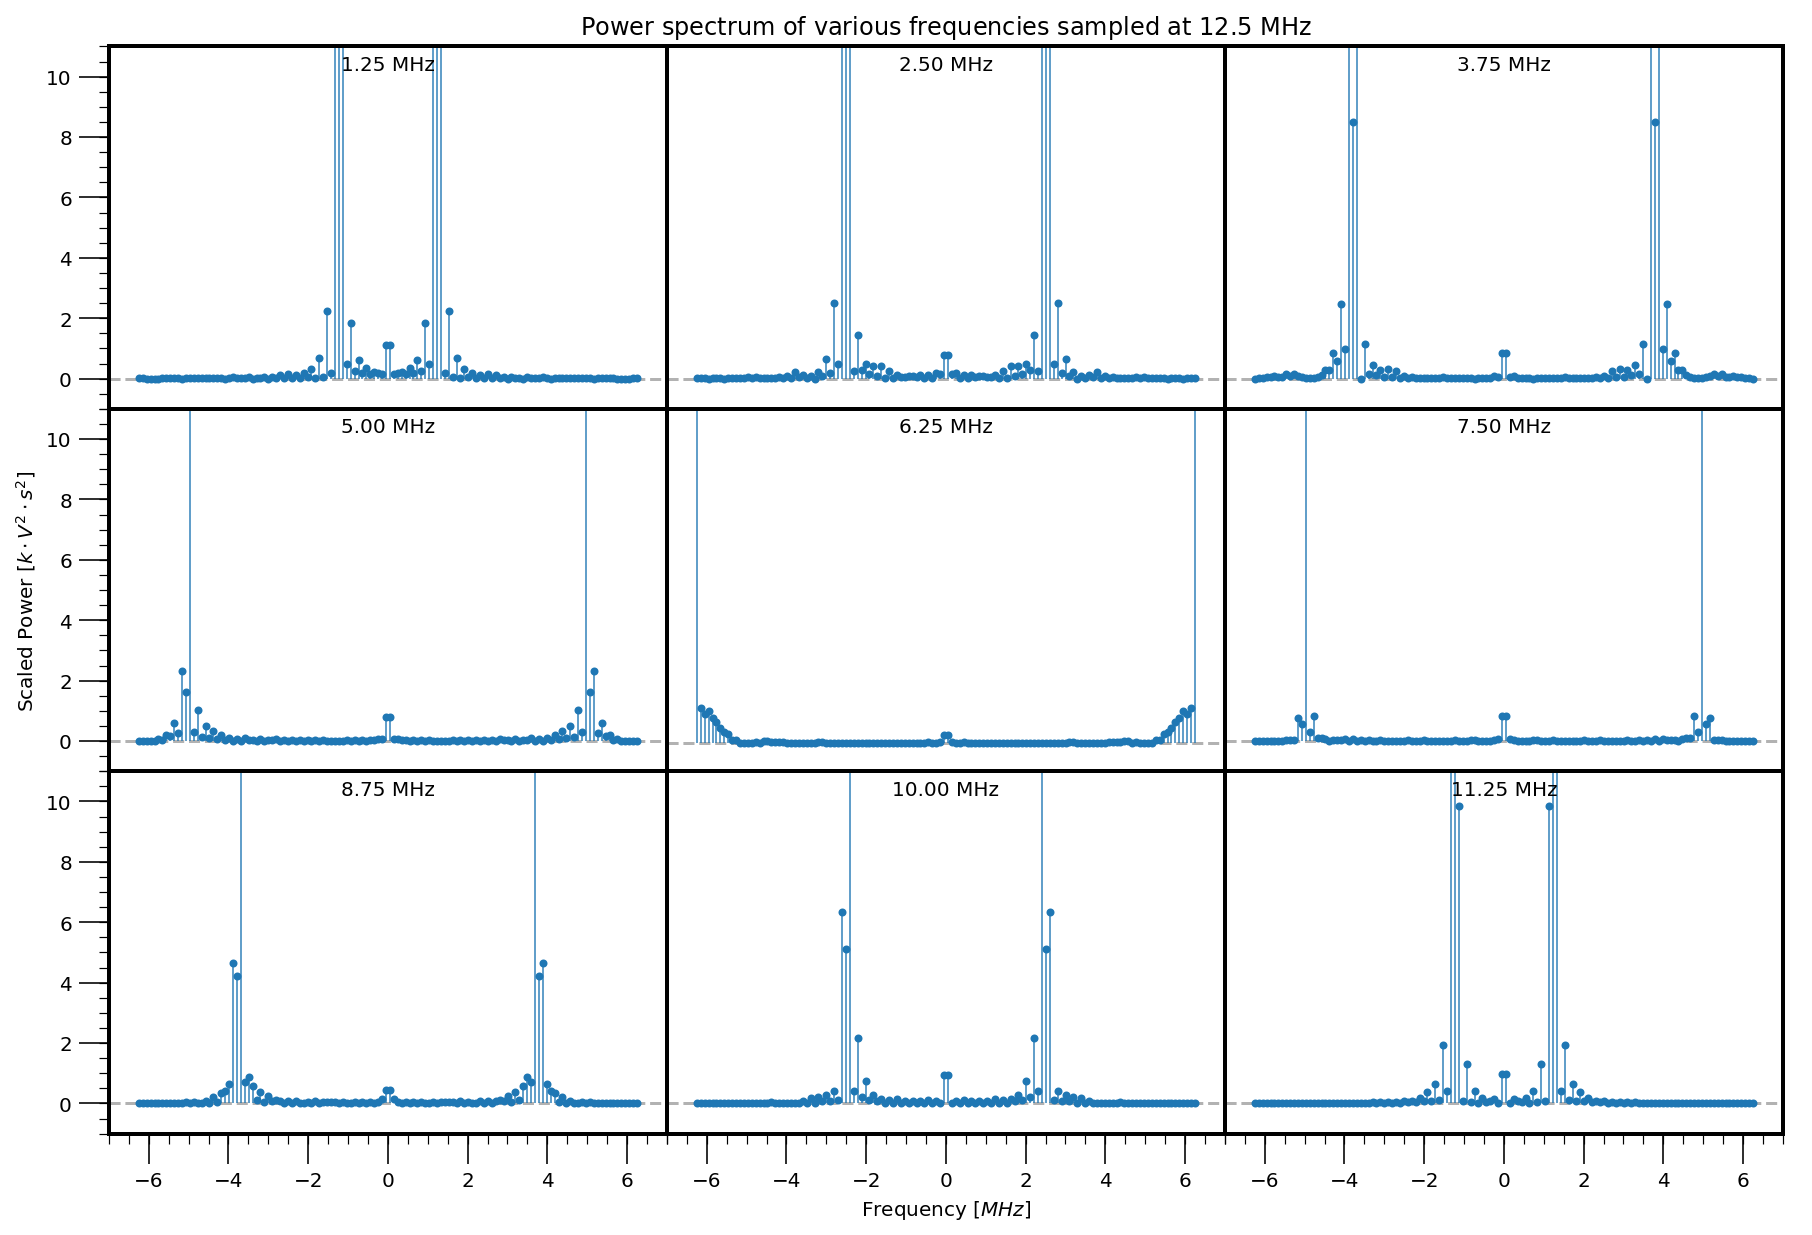

In [67]:
dft_samples = 16000


fig, axes = plt.subplots(3,3, figsize = (15, 10))
# to remove the 1e9 or 1e8 from plots
PLOT_SCALE = 6*1e8 / 1.1 

for i , ax in enumerate(axes.reshape(-1)):
    
    
    fft_data1 = ugradio.dft.dft(data[i][:N], t = time_array, f = freq_arr)

    power_spec = np.abs(fft_data1[1])**2
    
   
    
    # plot points
    ax.plot(fft_data1[0]/1e6, power_spec/ PLOT_SCALE,
            ls = 'None',
            marker = 'o',
            markersize = 3)    
    
    # Plot baseline
    ax.axhline(0, color = 'black', ls = '--', alpha = 0.3, zorder = 0)
    
    ax.vlines(fft_data1[0]/1e6,
              ymin = 0,
              ymax = power_spec/ PLOT_SCALE,
              color = '#1f77b4',
              alpha = 0.7,
              linewidth = 1)

    # remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # 
    ax.set_xlim(-7, 7)
    ax.set_ylim(-1,11)


    ax.text(0.5, 0.95,
            '%.2f MHz' %freqs_to_test[i].value,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes, fontsize = 10)
    if i == 4:
        ax.set_ylim(-2,24)
        ax.text(0.5, 0.85,
                r'',
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes, fontsize = 10)

    
    # set ticks for left side of plotgrid
    if (i % 3) == 0:
        ax.yaxis.set_major_locator(MultipleLocator(2))
        ax.yaxis.set_minor_locator(MultipleLocator(0.5)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)

    # set ticks for bottom side of plotgrid
    if i > 5:

        ax.set_xticks(np.arange(-6,7))
        ax.xaxis.set_major_locator(MultipleLocator(2))
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)

    if i == 3:
        ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$')
    

        
    if i == 7:
        ax.set_xlabel(r'Frequency $[MHz]$')
    
    if i == 1:
        ax.set_title(r'Power spectrum of various frequencies sampled at $12.5$ MHz',)

plt.subplots_adjust(hspace=0, wspace = 0)        
plt.show()
fig.savefig('power_spectrum.pdf', dpi = 'figure', format = 'pdf', transparent = True)

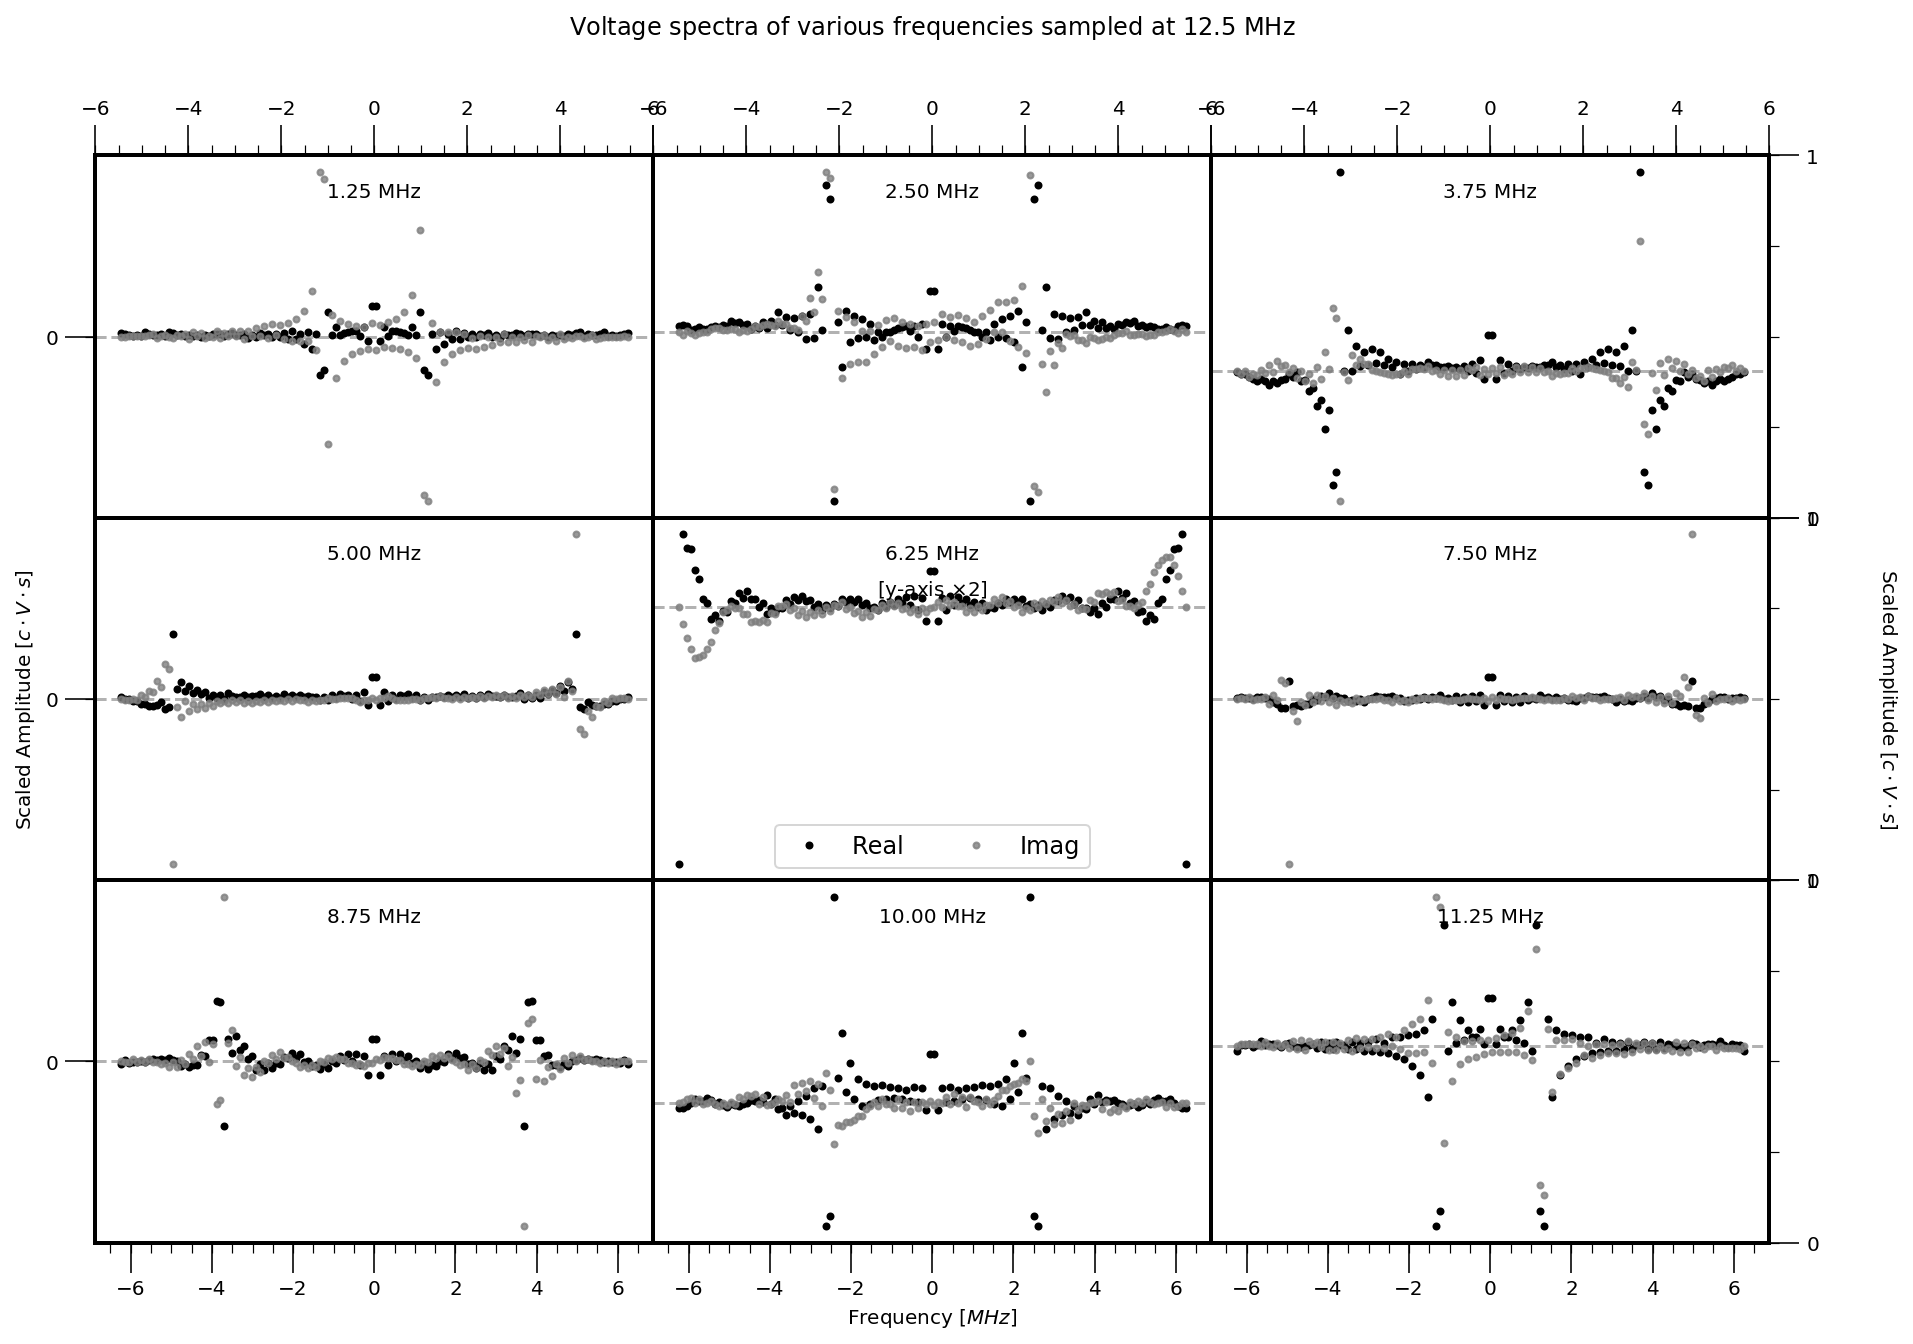

In [68]:
dft_samples = 16000
N = 2**7


fig, axes = plt.subplots(3,3, figsize = (15, 10))
# to remove the 1e9 or 1e8 from plots
PLOT_SCALE = 6*1e8 / 1.1 

for i , ax in enumerate(axes.reshape(-1)):

    
    fft_data1 = ugradio.dft.dft(data[i][:N], t = time_array, f = freq_arr)
    # plot points
    ax.plot(fft_data1[0]/1e6, fft_data1[1].real/ PLOT_SCALE,
            ls = 'None',
            marker = 'o',
            color = 'black',
            label='Real',
            markersize = 3,
            alpha = 1)
    
    
    # plot points    
    ax.plot(fft_data1[0]/1e6, fft_data1[1].imag/ PLOT_SCALE,
            ls = 'None',
            marker = 'o',
            color = 'grey',
            markerfacecolor = 'grey',
            label='Imag',
            markersize = 3,
            alpha = 0.8)
    
    
   
    # Plot baseline
    ax.axhline(0, color = 'black', ls = '--', alpha = 0.3, zorder = 0)

    # remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # 
    #ax.set_xlim(-7, 7)
    #ax.set_ylim(-2.5,2.5)


    ax.text(0.5, 0.9,
            '%.2f MHz' %freqs_to_test[i].value,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes, fontsize = 10)
    if i == 4:
        #ax.set_ylim(-5,5)
        ax.text(0.5, 0.8,
                r'[y-axis $\times2$]',
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes, fontsize = 10)
        
        ax.legend(ncol = 2, loc = 'lower center', fontsize = 12)

    
    # set ticks for left side of plotgrid
    if (i % 3) == 0:
        ax.yaxis.set_major_locator(MultipleLocator(1))
        ax.yaxis.set_minor_locator(MultipleLocator(0.25)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)

    # set ticks for right side of plotgrid
    if ((i - 2) % 3) == 0:
        ax_right = ax.twinx()
        #ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(1))
        ax_right.yaxis.set_minor_locator(MultipleLocator(0.25)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)
    
    # set ticks for top side of plotgrid
    if i < 3:
        ax_top = ax.twiny()
        #ax_top.set_xlim(ax.get_xlim())
        ax_top.set_xticks(np.arange(-6,7))
        ax_top.xaxis.set_major_locator(MultipleLocator(2))
        ax_top.xaxis.set_minor_locator(MultipleLocator(0.5))  
        ax_top.tick_params(which='major', length = 15)
        ax_top.tick_params(which='minor', length = 5)
    
    # set ticks for bottom side of plotgrid
    if i > 5:

        ax.set_xticks(np.arange(-6,7))
        ax.xaxis.set_major_locator(MultipleLocator(2))
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)

    if i == 3:
        ax.set_ylabel(r'Scaled Amplitude $[c \cdot V \cdot s]$')
    
    if i == 5:
        ax.set_ylabel(r'Scaled Amplitude $[c \cdot V \cdot s]$', rotation = 270, labelpad = 65)
        ax.yaxis.set_label_position('right')
        
    if i == 7:
        ax.set_xlabel(r'Frequency $[MHz]$')
    
    if i == 1:
        ax.set_title(r'Voltage spectra of various frequencies sampled at $12.5$ MHz', y = 1.3)
    
    
    


plt.subplots_adjust(hspace=0, wspace = 0)

plt.show()
fig.savefig('fourier_transform_3_3.pdf', dpi = 'figure', format = 'pdf', transparent = True)

# IFFT

In [69]:
N = 2**7
def f(i):
    fft_data1 = ugradio.dft.dft(data[i][:N], t = time_array, f = freq_arr)
    power_spec = np.abs(fft_data1[1])**2    
    
    
    ift = ugradio.dft.idft(power_spec, freq_arr, time_array)
    plt.plot(ift[0], ift[1])

    
interactive_plot = interactive(f, i=(0,8))
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT00LCBkZXNjcmlwdGlvbj11J2knLCBtYXg9OCksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSh1J3dpZGdldC1pbnRlcmFjdCfigKY=


In [70]:
N = 2**7
#print(N)

def f(i):   

    sampling_freq = 12.5e6

    fft_data = np.fft.fft(data[i][:N])
    fft_freq_data = np.fft.fftfreq(len(fft_data), d = 1/sampling_freq)

    power = np.abs(fft_data)**2

    ift_data = np.fft.ifft(power)

    plt.title('IFT of Power Spectrum of data ' + str(i+1))
    plt.ylabel('Power')
    plt.xlabel('Time')
    plt.plot(np.fft.fftshift(ift_data))

interactive_plot = interactive(f, i=(0,8))
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT00LCBkZXNjcmlwdGlvbj11J2knLCBtYXg9OCksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSh1J3dpZGdldC1pbnRlcmFjdCfigKY=


# 4.4  LEAKAGE POWER

In [71]:
def f(i, P):
    sampling_freq = 12.5e6
    N = 2**7
    
    
    leakage_freq = np.linspace(starting_freq, ending_freq, num = 2**P)
    
    fft_norm = ugradio.dft.dft(data[i][:N], t = time_array, f = freq_arr)
    fft_leakage = ugradio.dft.dft(data[i][:N], t = time_array, f = leakage_freq)
    
    delta_nu_norm = sampling_freq/N
    delta_nu_small = np.abs(leakage_freq[5] - leakage_freq[6])
    
    power_spec = np.abs(fft_leakage[1])**2
    power_norm = np.abs(fft_norm[1])**2

    fig = plt.figure(figsize = (10, 5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax1.set_title(r'Power Spectrum with $\Delta \nu $ = ' + str(round(delta_nu_small)))
    ax1.set_xlabel(r'$\nu$ (MHz) ')
    ax1.set_ylabel('Power')
    ax1.stem(fft_leakage[0]/1e6, power_spec)
    ax1.set_xlim(-8,8)
    
    ax2.set_title(r'Power Spectrum with $\Delta \nu $ = ' + str(round(delta_nu_norm)))
    ax2.set_xlabel(r'$\nu$ (MHz) ')
    ax2.set_ylabel('Power')
    ax2.stem(fft_norm[0]/1e6, power_norm)

def fft(i):
    leakage = np.fft.fft(data[i][:N],n = 2**11)
    freq = np.fft.fftfreq(2**11)
    power = np.abs(leakage)**2
    plt.plot(np.fft.fftshift(freq), power)
    
'''    
interactive_plot = interactive(f, i=(0,8), P = (7, 14))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
'''

interactive_plot = interactive(f, i=(0,8), P = (7,14))
#output.layout.height = '350px'
interactive_plot

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT00LCBkZXNjcmlwdGlvbj11J2knLCBtYXg9OCksIEludFNsaWRlcih2YWx1ZT0xMCwgZGVzY3JpcHRpb249dSdQJywgbWF4PTHigKY=


# 4.5 Frequency Resolution

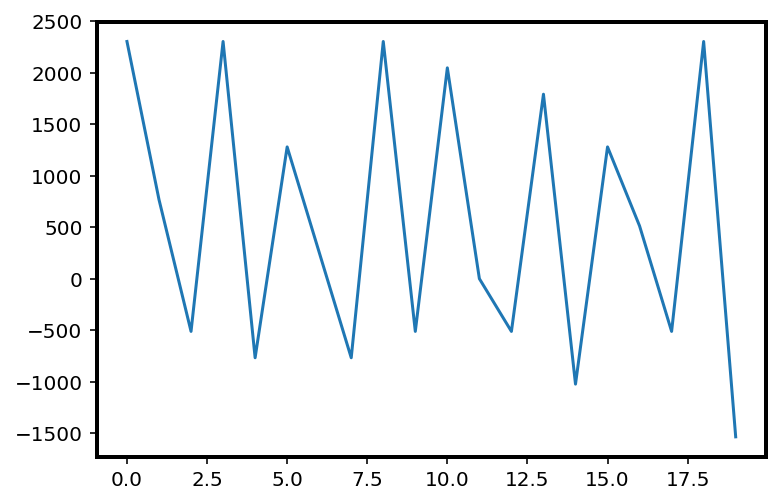

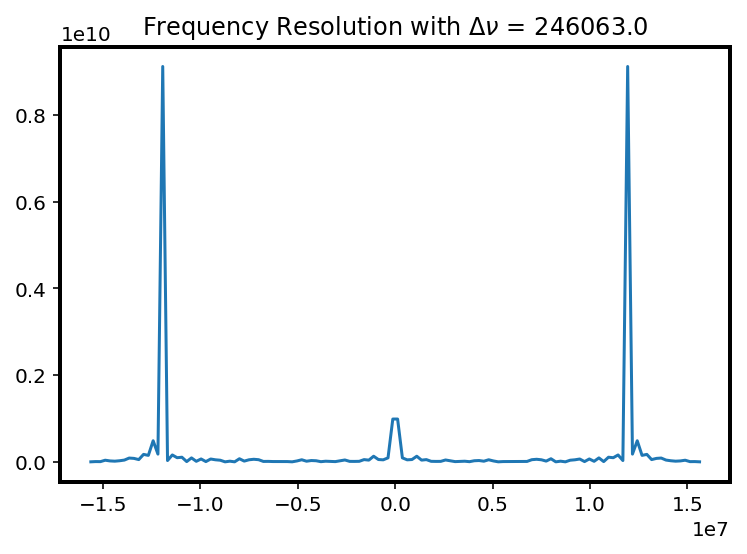

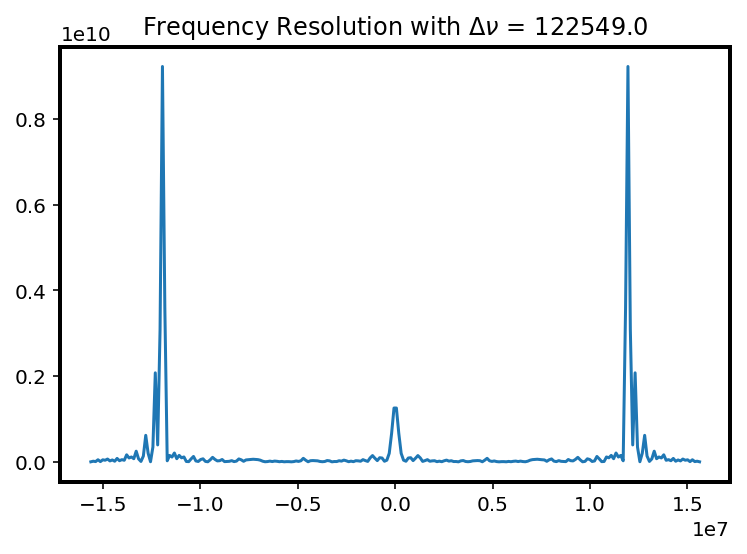

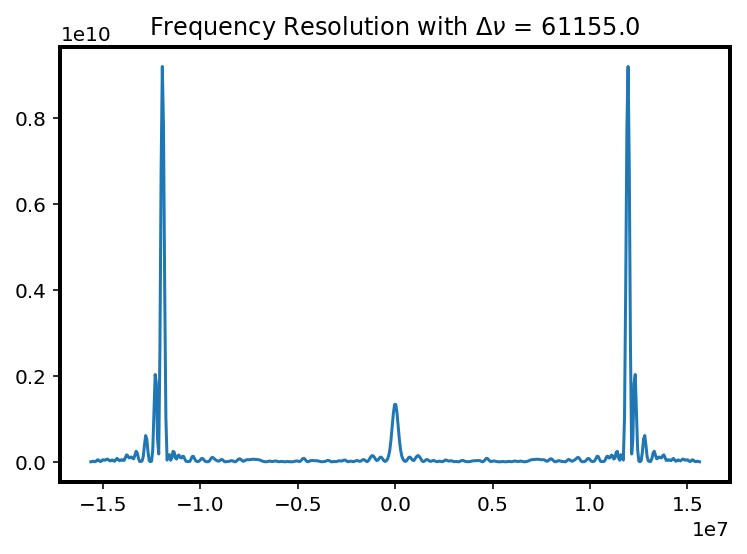

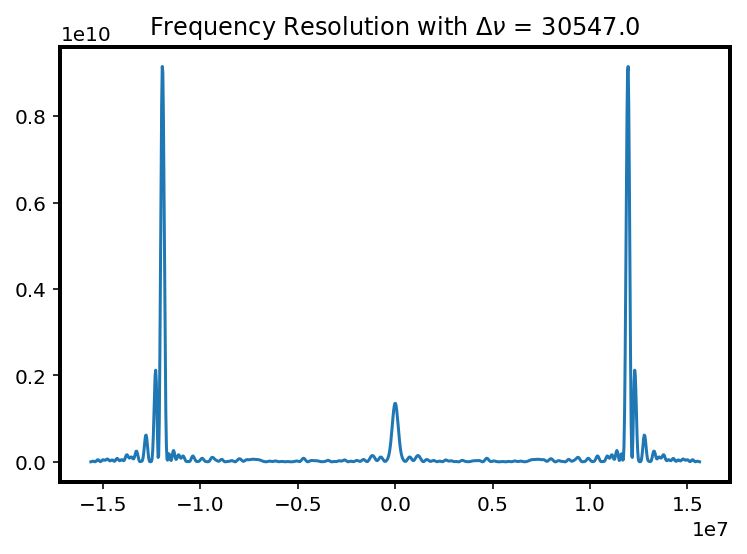

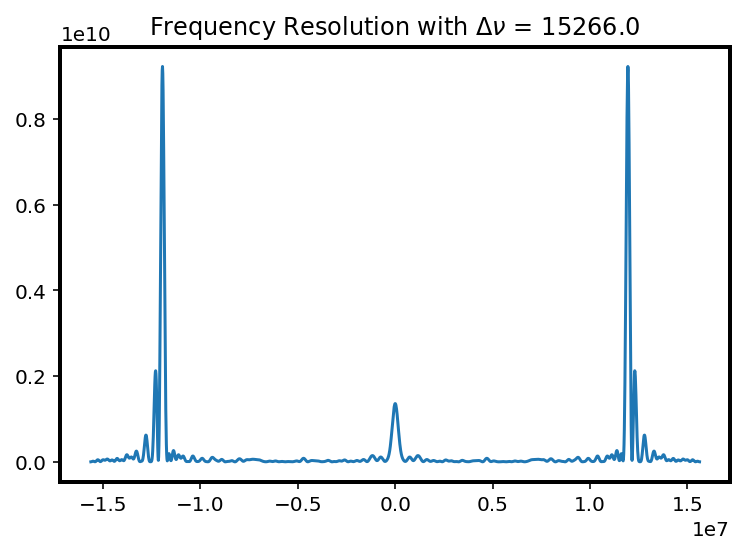

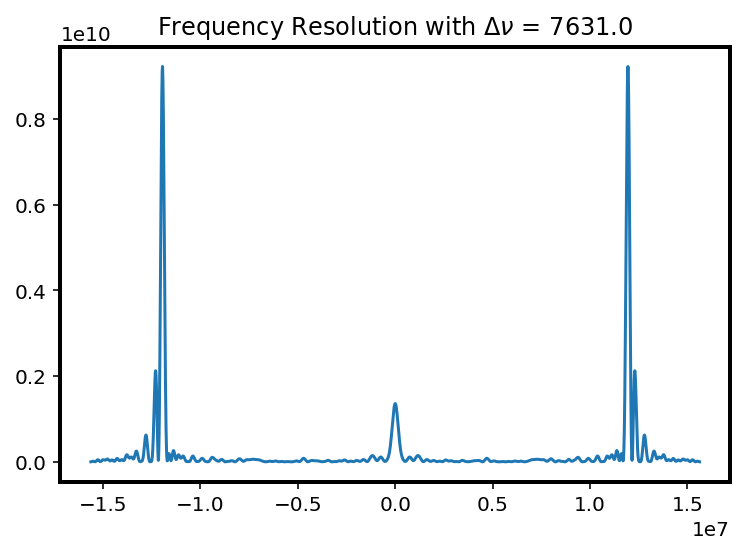

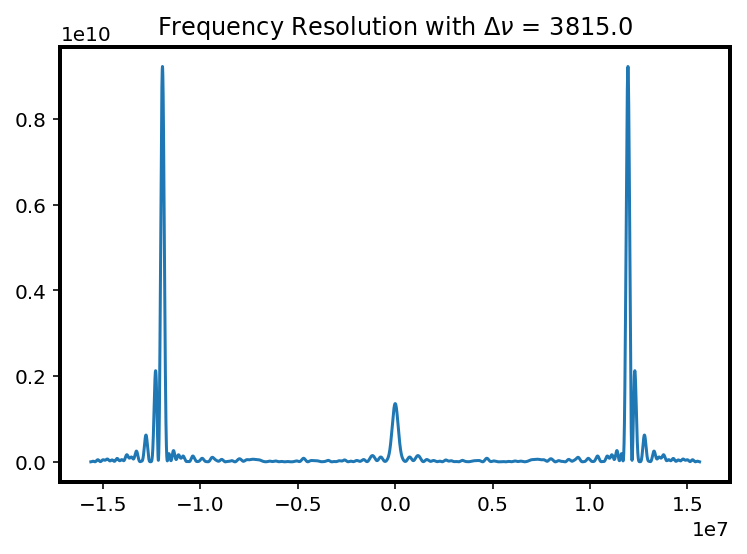

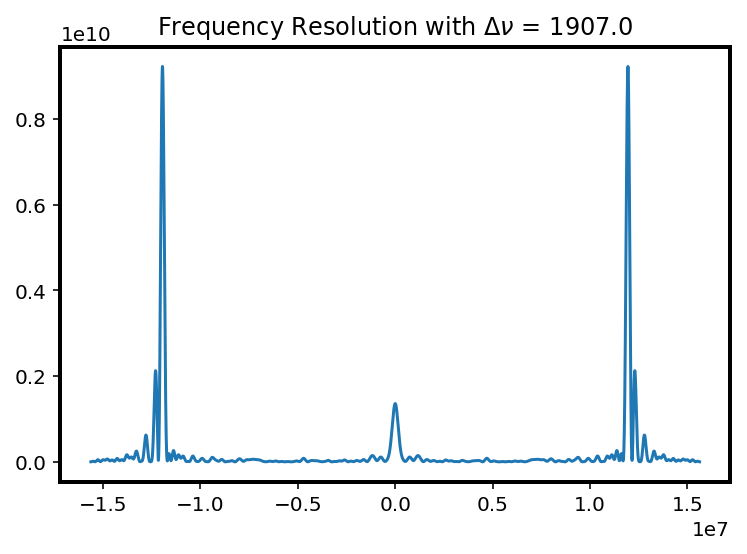

In [72]:
#FR_data = ugradio.pico.capture_data('500mV', divisor = 2)
N = 2**7
P = 2**12

FR_data = np.load('FR1.npy')
sampling_freq = 31.25e6

plt.plot(FR_data[:20])
start_time = -(N/2)/sampling_freq
end_time = ((N/2) - 1)/sampling_freq
time_array = np.linspace(start_time, end_time, num = N)

starting_freq = -sampling_freq/2
ending_freq = (sampling_freq/2)*(1-(2/N))
freq_arr = np.linspace(starting_freq, ending_freq, num = P)

FR_dft = ugradio.dft.dft(FR_data[:N],t = time_array, f = freq_arr)
power_FR = np.abs(FR_dft[1])**2

#plt.plot(freq_arr, power_FR)

def plot(data, Num):
    
    
    plt.figure()
    starting_freq = -sampling_freq/2
    ending_freq = (sampling_freq/2)#*(1-(2/(2**Num)))
    freq_arr = np.linspace(starting_freq, ending_freq, num = 2**Num)
    
    delta_nu = np.abs(freq_arr[6]- freq_arr[7])
    
    FR_dft = ugradio.dft.dft(data[:N],t = time_array, f = freq_arr)
    power_FR = np.abs(FR_dft[1])**2
    
    plt.title(r'Frequency Resolution with $\Delta \nu$ = ' + str(round(delta_nu)))
    plt.plot(freq_arr, power_FR)
    plt.show()
    #print(len(freq_arr))
    
    
for i in range(7, 15):
    plot(FR_data, i)
    #plt.figure()

# 4.6 Nyquist Window

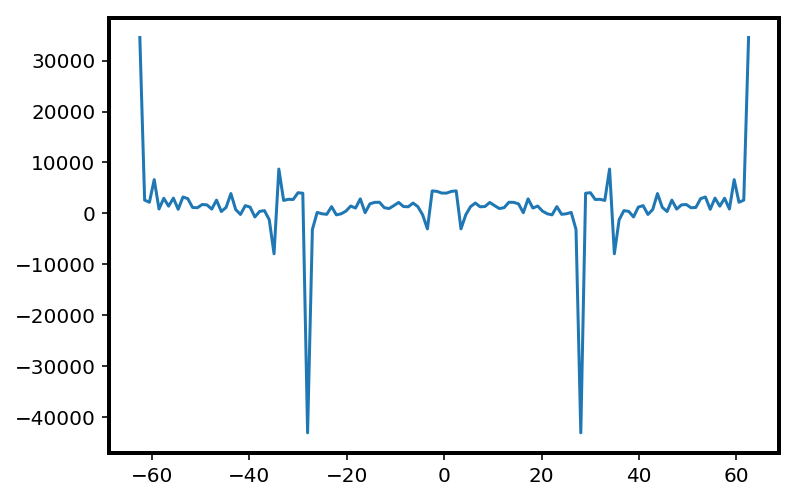

In [73]:
N = 2**7
n = 4

start_time =  (-(N/2)/sampling_freq)
end_time = ((N/2) - 1)/sampling_freq
time_array = np.linspace(start_time, end_time, num = N)

starting_freq = n * (-sampling_freq/2)
ending_freq = n * ((sampling_freq/2)*(1-(2/N)))
freq_arr = np.linspace(starting_freq, ending_freq, num = N)

nyquist_window = ugradio.dft.dft(data[0][:N], t = time_array, f = freq_arr)

plt.plot(nyquist_window[0]/1e6, nyquist_window[1])

# 4.7 FTs of Noise

In [74]:
all_noise_data = np.load('all_noise_data.npy')
print(len(all_noise_data))

32


Calculating the Mean voltage, Mean Square Voltage and Root Mean Square Voltage for noise data 1

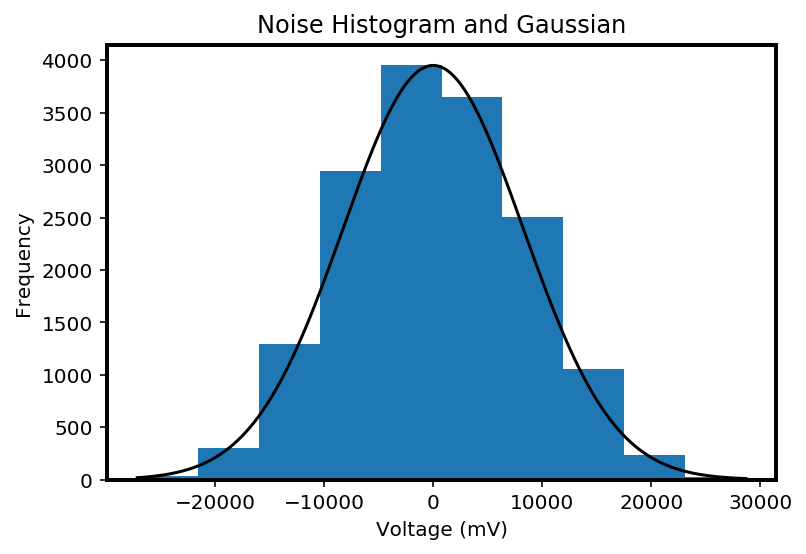

In [75]:
#acquiring the noise data 1
noise1 = all_noise_data[0]

#summing up the volatges in data 1
sum_voltages = np.sum(noise1)

#calculating the mean voltage
mean_voltage = sum_voltages/len(noise1)

#code that calculates the average square voltage

#the variable holds the square of the voltages 
square_voltage = np.array([x**2 for x in noise1])

#variable that holds the sum of square voltages
sum_square_voltage = np.sum(square_voltage)

#calculates the mean for the mean_square voltage
mean_square_voltage = sum_square_voltage/len(noise1)

#calculates the rms voltage
rms_voltage = np.sqrt(mean_square_voltage)

#code that gets the frequency so that we can set that as our amplitude
#in the gaussian
freq, bins, lists = plt.hist(noise1)

#makes an array of x-values ot plug intot he gaussian equation f
x = np.linspace(bins[0], bins[-1], len(noise1))

#the gaussian equation
f = np.amax(freq) * np.exp(-x**2/(2 * mean_square_voltage))#/(np.sqrt(2*np.pi) * rms_voltage)

#code that plots the histogram along with the gaussian
plt.title('Noise Histogram and Gaussian')
plt.xlabel('Voltage (mV)')
plt.ylabel('Frequency')
plt.plot(x, f, 'k-')
#plt.hist(noise1)

Power Spectrum for the Noise (FT)

[3917312.        -1.70163959e-13j   -9703.14262677+3.24801025e+04j
   34801.68680582-2.68807361e+04j ...   -6069.61643034-6.67038102e+03j
   34801.68680582+2.68807361e+04j   -9703.14262677-3.24801025e+04j]
[ 0.000e+00  6.250e-05  1.250e-04 ... -1.875e-04 -1.250e-04 -6.250e-05]
32


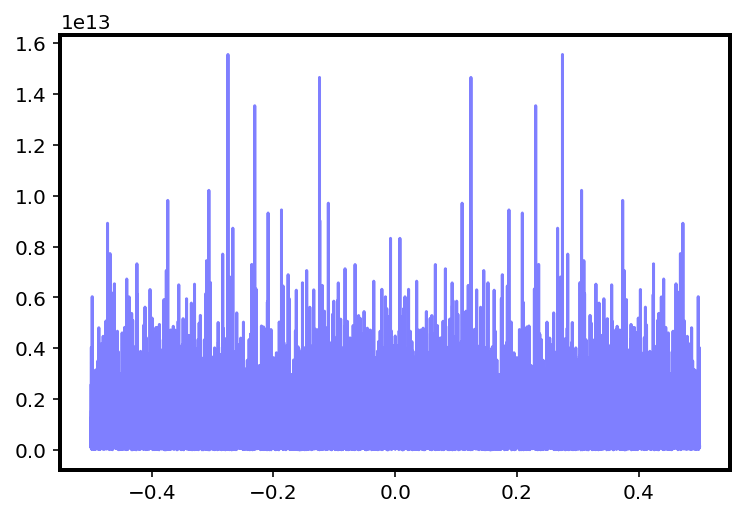

In [76]:
pow_spec_noise = []
avg_power_spec = []
fft_freq = []
FT = np.fft.fft(data[0])
nu = np.fft.fftfreq(len(data[0]))

print(FT)
print(nu)
def power_spec(data):
    
    for i in range(len(data)):
        
        FT = np.fft.fft(data[i])
        nu = np.fft.fftfreq(len(data[i]))
        
        power_spectra = np.abs(FT)**2
        pow_spec_noise.append(power_spectra)
        
        avg_pow_spec = np.sum(power_spectra)/len(data[i])
        avg_power_spec.append(avg_pow_spec)
        fft_freq.append(nu)
    
        
power_spec(all_noise_data)
print(len(all_noise_data))

noise_power_arr = np.array(pow_spec_noise)

plt.plot(np.fft.fftshift(fft_freq[0]), np.fft.fftshift(pow_spec_noise[0]), 'b', alpha = .5)
#plt.plot(num, avg_power_spec, 'bo')

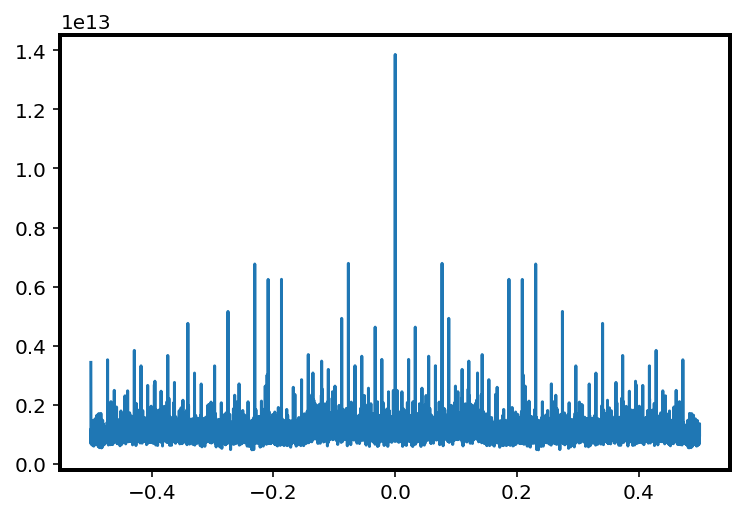

In [77]:
def avg_noise_power(data, N):
    
    add = 0
    j = 0
    
    while j < N:
        add += data[j]
        j+=1    
    
    avg = add/N
    return avg

avg_noisepower = avg_noise_power(noise_power_arr, 32) 


plt.plot(np.fft.fftshift(fft_freq[0]), np.fft.fftshift(avg_noisepower))

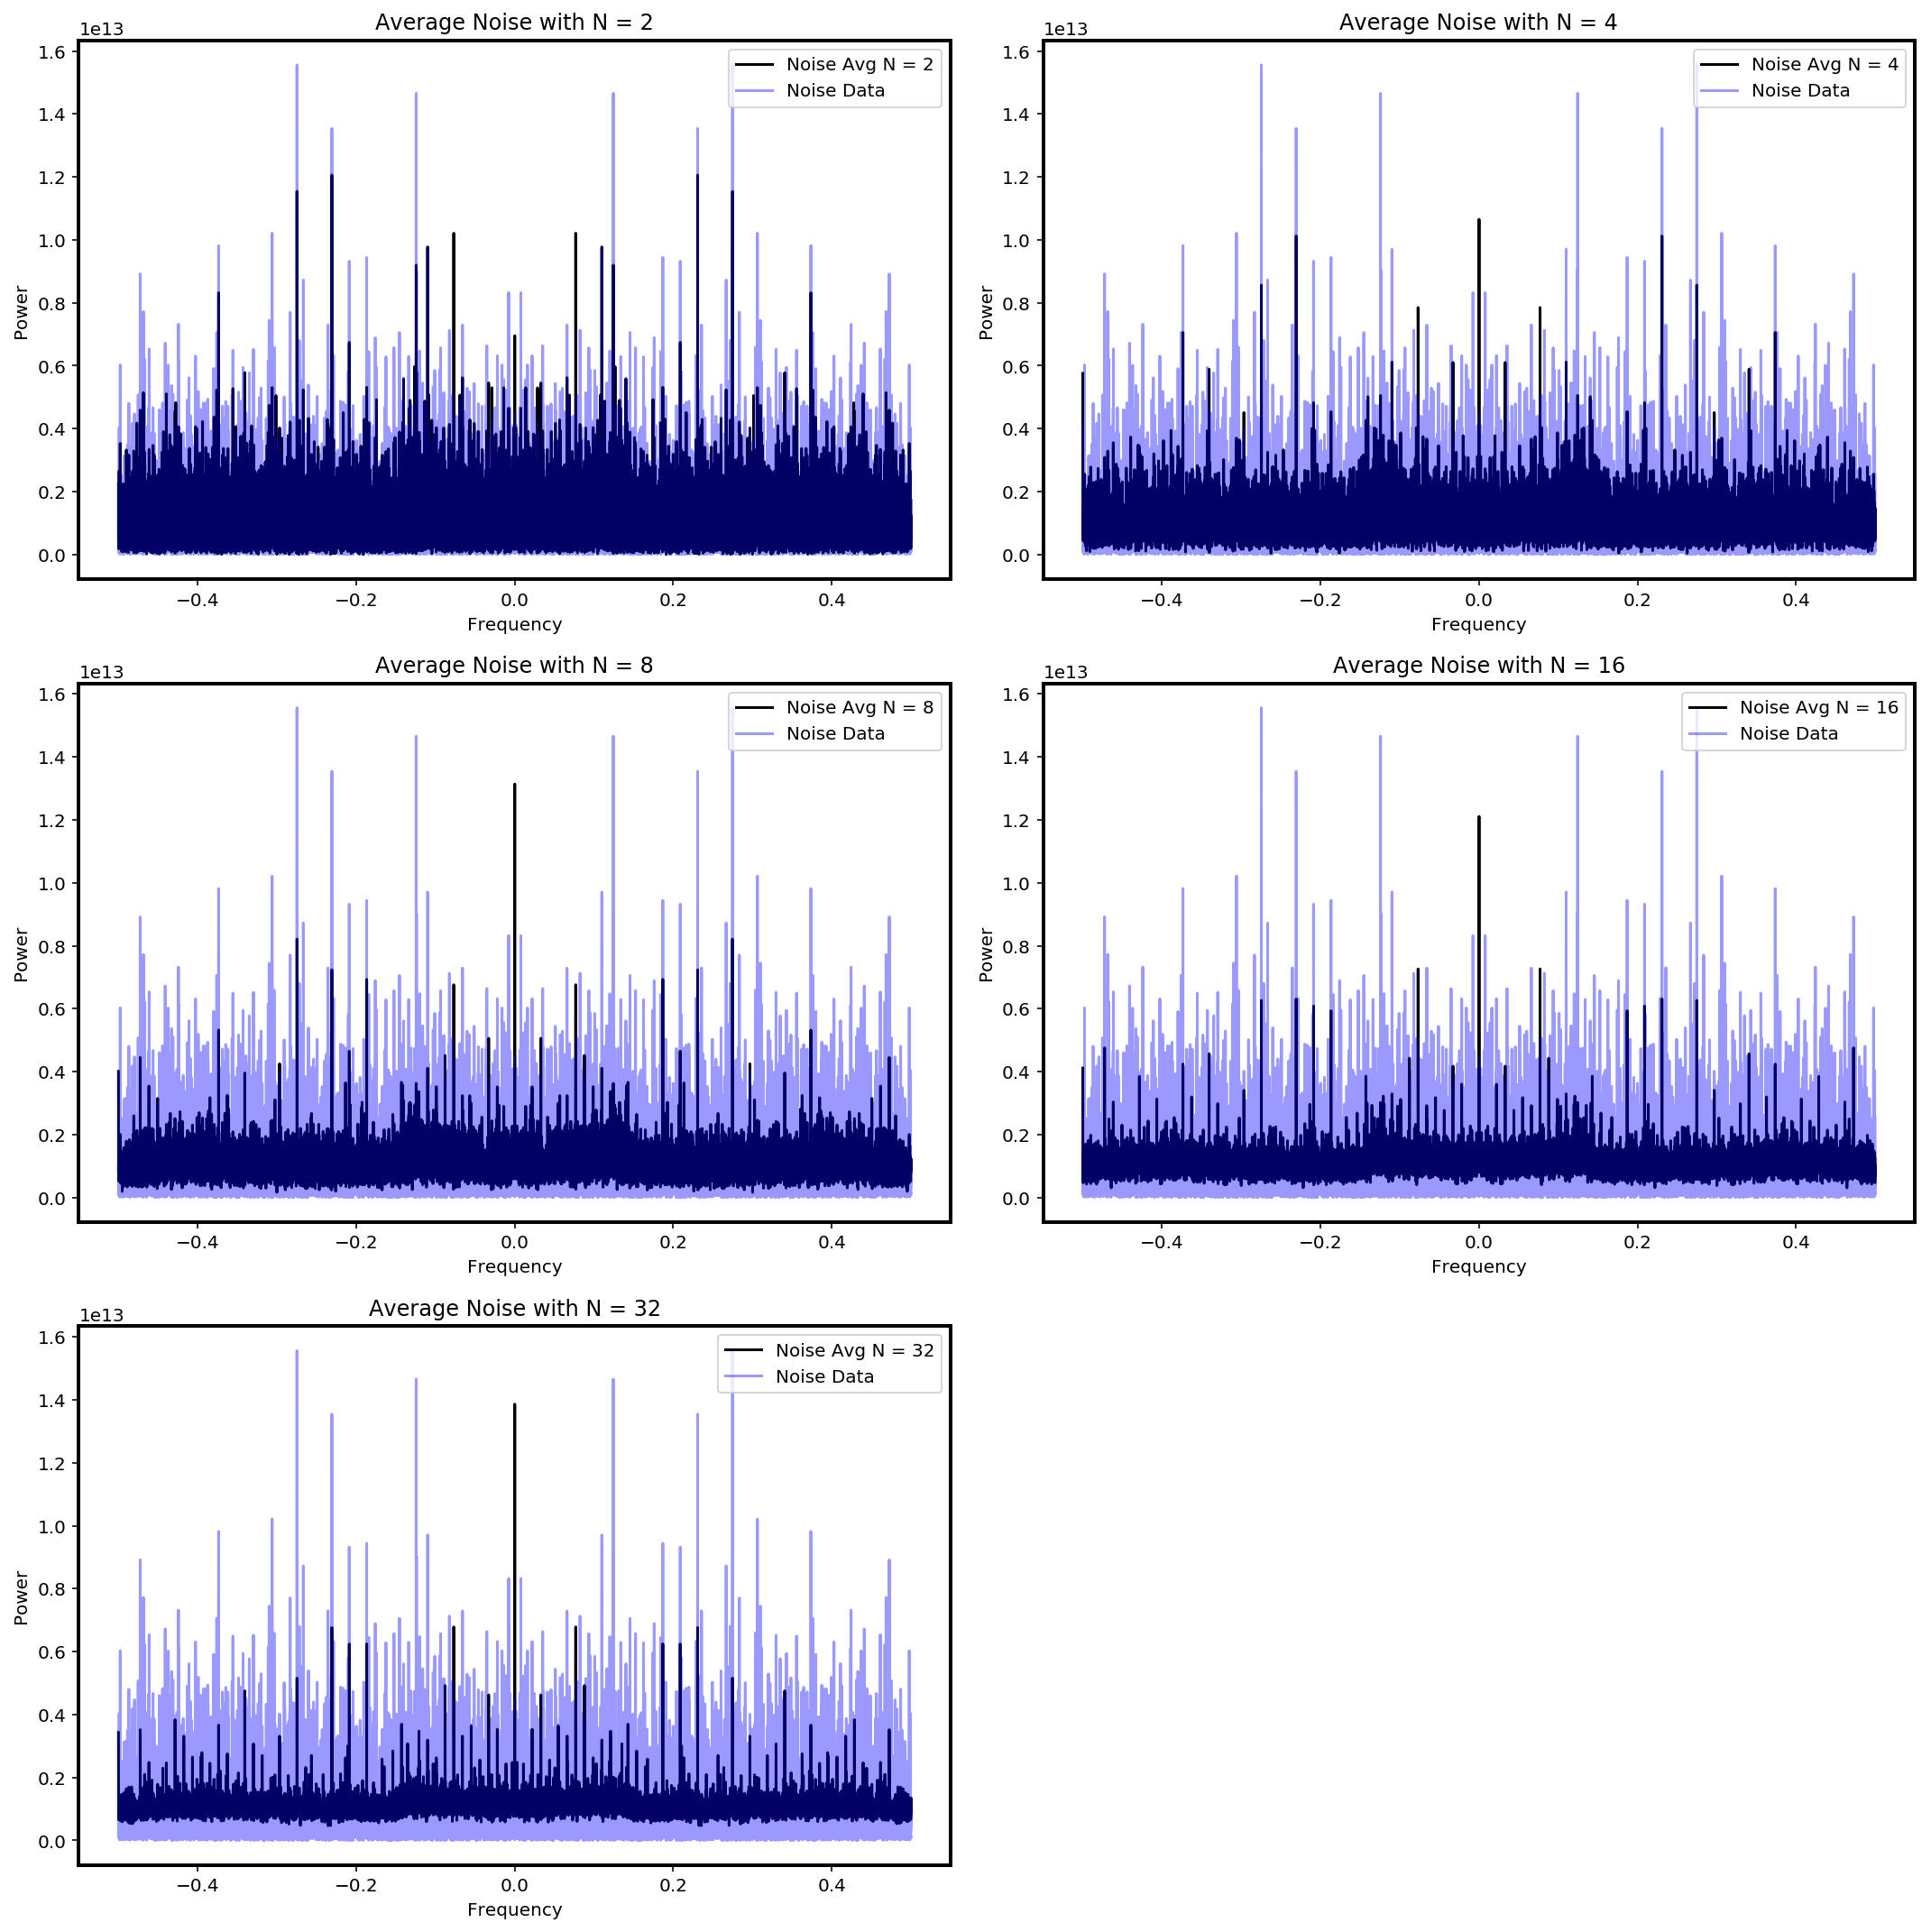

In [78]:
avg_noisepower32 = avg_noise_power(noise_power_arr, 32)
avg_noisepower16 = avg_noise_power(noise_power_arr, 16)
avg_noisepower8 = avg_noise_power(noise_power_arr, 8)
avg_noisepower4 = avg_noise_power(noise_power_arr, 4)
avg_noisepower2 = avg_noise_power(noise_power_arr, 2)

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

ax1.set_title('Average Noise with N = 2')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Power')
ax1.plot(np.fft.fftshift(fft_freq[0]), np.fft.fftshift(avg_noisepower2), 'k-', label = 'Noise Avg N = 2')
ax1.plot(np.fft.fftshift(fft_freq[0]), np.fft.fftshift(pow_spec_noise[0]), 'b-', alpha = .4, label = 'Noise Data')
ax1.legend( loc = 'upper right')

ax2.set_title('Average Noise with N = 4')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power')
ax2.plot(np.fft.fftshift(fft_freq[0]), np.fft.fftshift(avg_noisepower4), 'k-', label = 'Noise Avg N = 4')
ax2.plot(np.fft.fftshift(fft_freq[0]), np.fft.fftshift(pow_spec_noise[0]), 'b-', alpha = .4, label = 'Noise Data')
ax2.legend( loc = 'upper right')

ax3.set_title('Average Noise with N = 8')
ax3.set_xlabel('Frequency')
ax3.set_ylabel('Power')
ax3.plot(np.fft.fftshift(fft_freq[0]), np.fft.fftshift(avg_noisepower8), 'k-', label = 'Noise Avg N = 8')
ax3.plot(np.fft.fftshift(fft_freq[0]), np.fft.fftshift(pow_spec_noise[0]), 'b-', alpha = .4, label = 'Noise Data')
ax3.legend( loc = 'upper right')

ax4.set_title('Average Noise with N = 16')
ax4.set_xlabel('Frequency')
ax4.set_ylabel('Power')
ax4.plot(np.fft.fftshift(fft_freq[0]), np.fft.fftshift(avg_noisepower16), 'k-', label = 'Noise Avg N = 16')
ax4.plot(np.fft.fftshift(fft_freq[0]), np.fft.fftshift(pow_spec_noise[0]), 'b-', alpha = .4, label = 'Noise Data')
ax4.legend( loc = 'upper right')

ax5.set_title('Average Noise with N = 32')
ax5.set_xlabel('Frequency')
ax5.set_ylabel('Power')
ax5.plot(np.fft.fftshift(fft_freq[0]), np.fft.fftshift(avg_noisepower32), 'k-', label = 'Noise Avg N = 32')
ax5.plot(np.fft.fftshift(fft_freq[0]), np.fft.fftshift(pow_spec_noise[0]), 'b-', alpha = .4, label = 'Noise Data')
ax5.legend( loc = 'upper right')

plt.tight_layout()

IndexError: index 5 is out of bounds for axis 0 with size 5

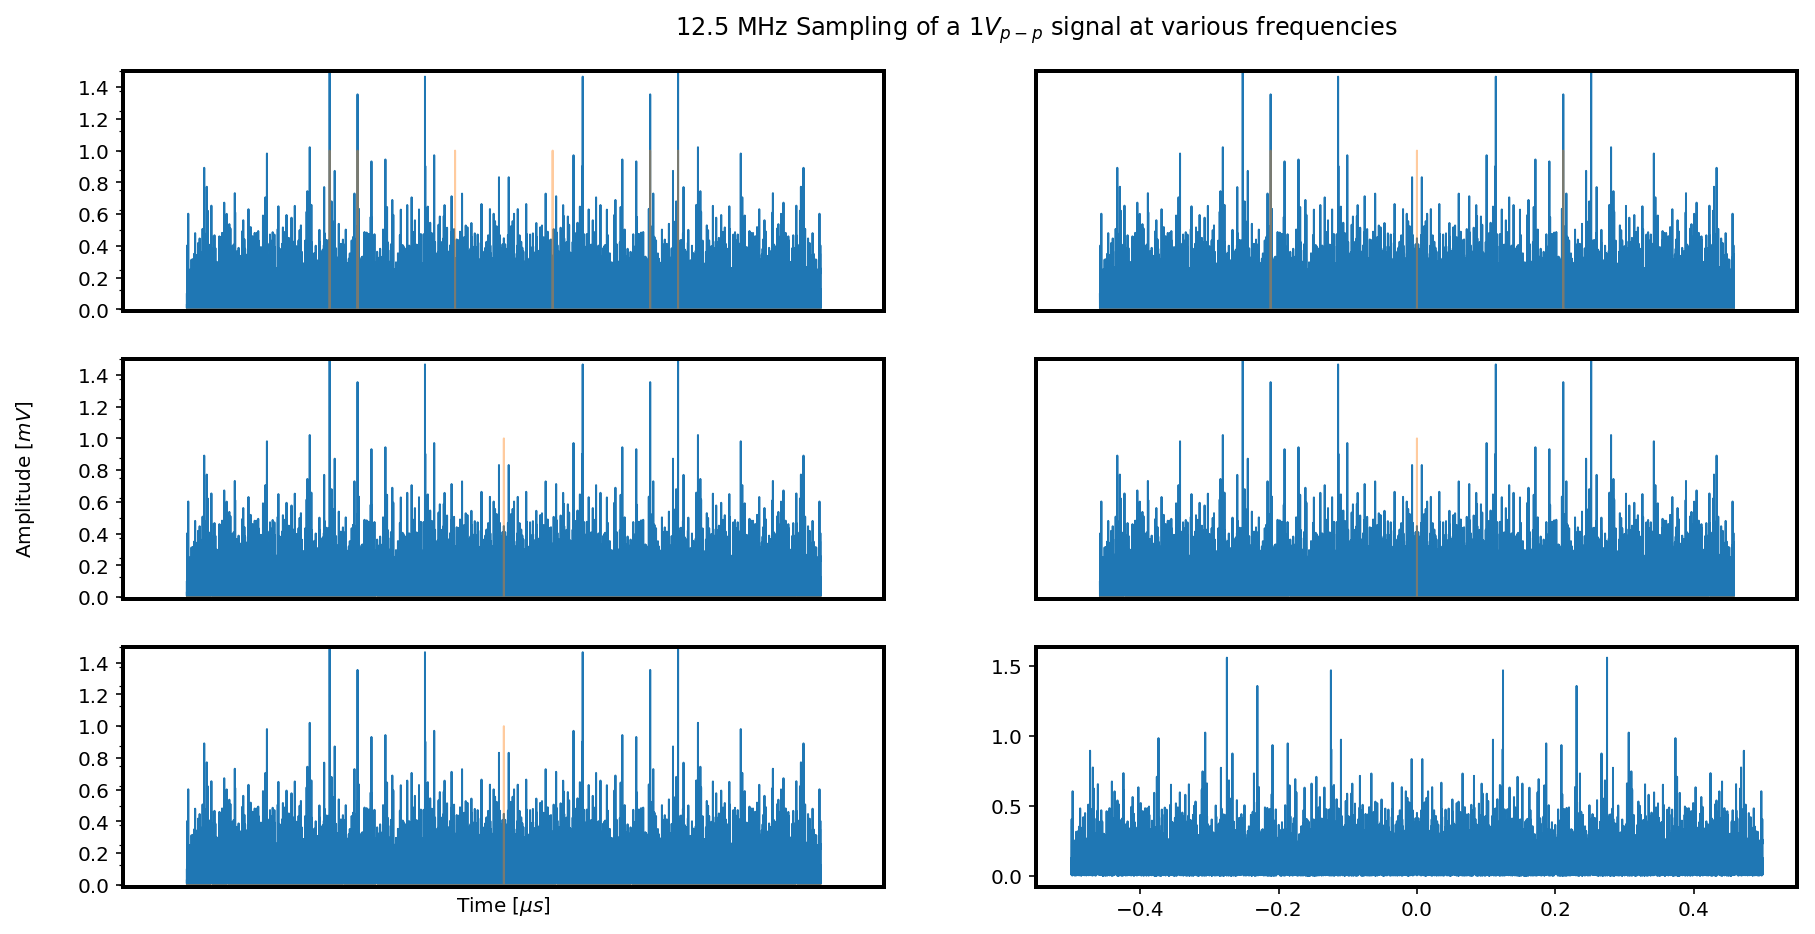

In [82]:

avg_noisepower32 = avg_noise_power(noise_power_arr, 32)
avg_noisepower16 = avg_noise_power(noise_power_arr, 16)
avg_noisepower8 = avg_noise_power(noise_power_arr, 8)
avg_noisepower4 = avg_noise_power(noise_power_arr, 4)
avg_noisepower2 = avg_noise_power(noise_power_arr, 2)

avg_noisepower = np.vstack((avg_noisepower2, avg_noisepower4, avg_noisepower8, avg_noisepower16, avg_noisepower32))


fig, axes = plt.subplots(3,2, figsize = (15,7.5), )


for i, ax in enumerate(axes.reshape(-1)):

     
     
    ax.plot(np.fft.fftshift(fft_freq[0]), (np.fft.fftshift(pow_spec_noise[0]))/1e13,
           #color = 'black',
            #marker='o',
            #markerfacecolor='white',
            #markersize = 4,
            linewidth = 1)
           
    
    

    ax.plot(np.fft.fftshift(fft_freq[0]), (np.fft.fftshift(avg_noisepower[i]))//1e13,
            #color = 'black',
            #marker='o',
            #markerfacecolor='white',
            #markersize = 4,
            linewidth = 1, alpha=.4)

    
    # remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # 
    ax.set_xlim(-.6, .6)
    ax.set_ylim(-.01,1.5)

    
    # set ticks for left side of plotgrid
    if (i % 2) == 0:
        ax.yaxis.set_major_locator(MultipleLocator(.2))
        ax.yaxis.set_minor_locator(MultipleLocator(0.125)) 
        #ax.tick_params(which='major', length = 1e12)
        #ax.tick_params(which='minor', length = 5)



    # set ticks for bottom side of plotgrid
    #if i > 5:

        #ax.set_xticks(np.arange(-6,7))
        #ax.xaxis.set_major_locator(MultipleLocator(2))
        #ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        #ax.tick_params(which='major', length = 15)
        #ax.tick_params(which='minor', length = 5)
 

    if i == 2:
        ax.set_ylabel(r'Amplitude $[mV]$',labelpad = 20)
    
    if i == 4:
        ax.set_xlabel(r'Time $[\mu s]$')
    
    if i == 1:
        ax.set_title(r'$12.5$ MHz Sampling of a $1 V_{p-p}$ signal at various frequencies ', x = 0, y = 1.1)
    #if i == 5:
     #   ax.axis('off')
    

    

plt.subplots_adjust(hspace=0, wspace = 0)
plt.show()
fig.savefig('time_series_3_2.pdf', dpi = 'figure', format = 'pdf', transparent = True)

In [83]:
sampling_freq = 6.0e6

#in the time_data1 variable I divided the time by 1e⁻9 so that the time 
#in the array is now in nanoseconds
time = (1/sampling_freq) * np.arange(0, 16001, 1)* (1/1e-9)

def f(i):
    plt.hist(all_noise_data[i])
    plt.ylim((0,5000))
    plt.xlim((-30000,+30000))
interactive_plot = interactive(f, i=(0,8))
#output.layout.height = '350px'
interactive_plot

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT00LCBkZXNjcmlwdGlvbj11J2knLCBtYXg9OCksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSh1J3dpZGdldC1pbnRlcmFjdCfigKY=


# 5.4  The Power Spectrum and the Autocorrelation Function 

In [84]:
# here I tried the same thing as above, but noticed that the freq and time
# arrays were optional and omitted them - this is what came out.
#ift = ugradio.dft.idft(power_spec, freq_arr, vsamp=1)
#print (len(power_spec), len(time_array), len(freq_arr))
#plt.plot(ift[0], ift[1])

In [85]:
#fft_data = np.fft.fft(data[i][:N])

#correlation = np.correlate(data1, fft_data[1])
#print(correlation)
#plt.plot(correlation)

# 5.5 The Fast Fourier Transform

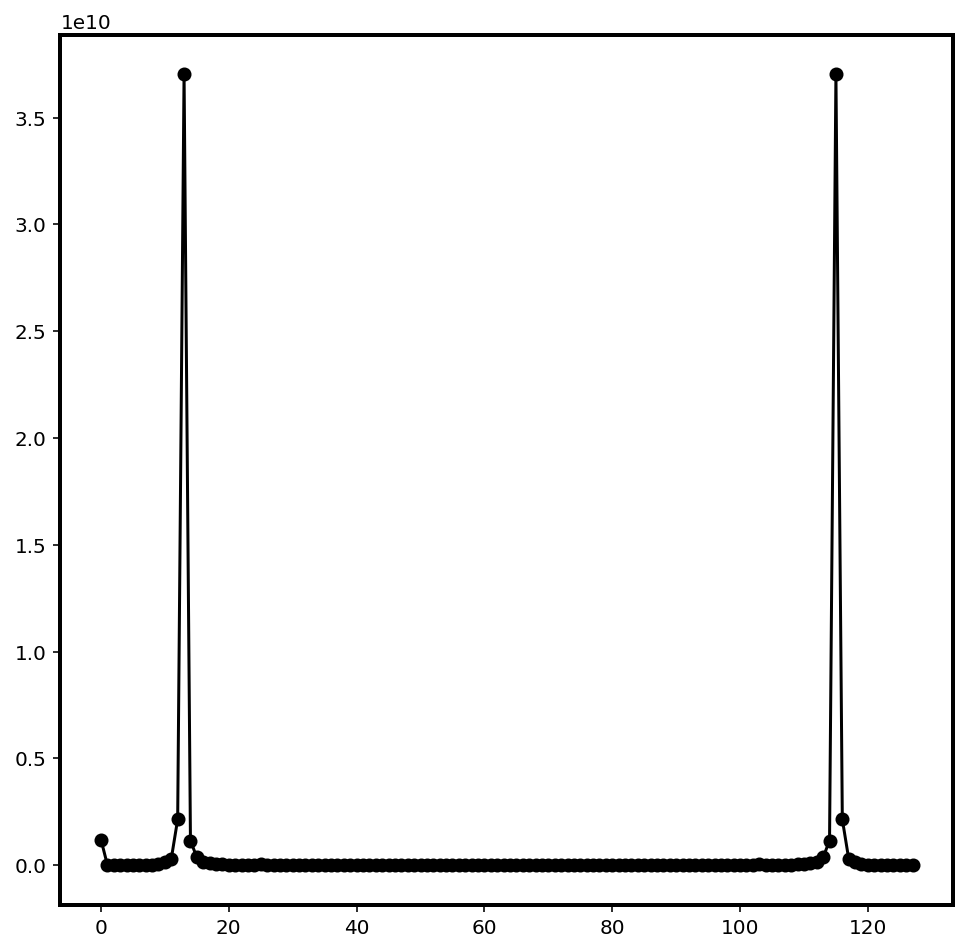

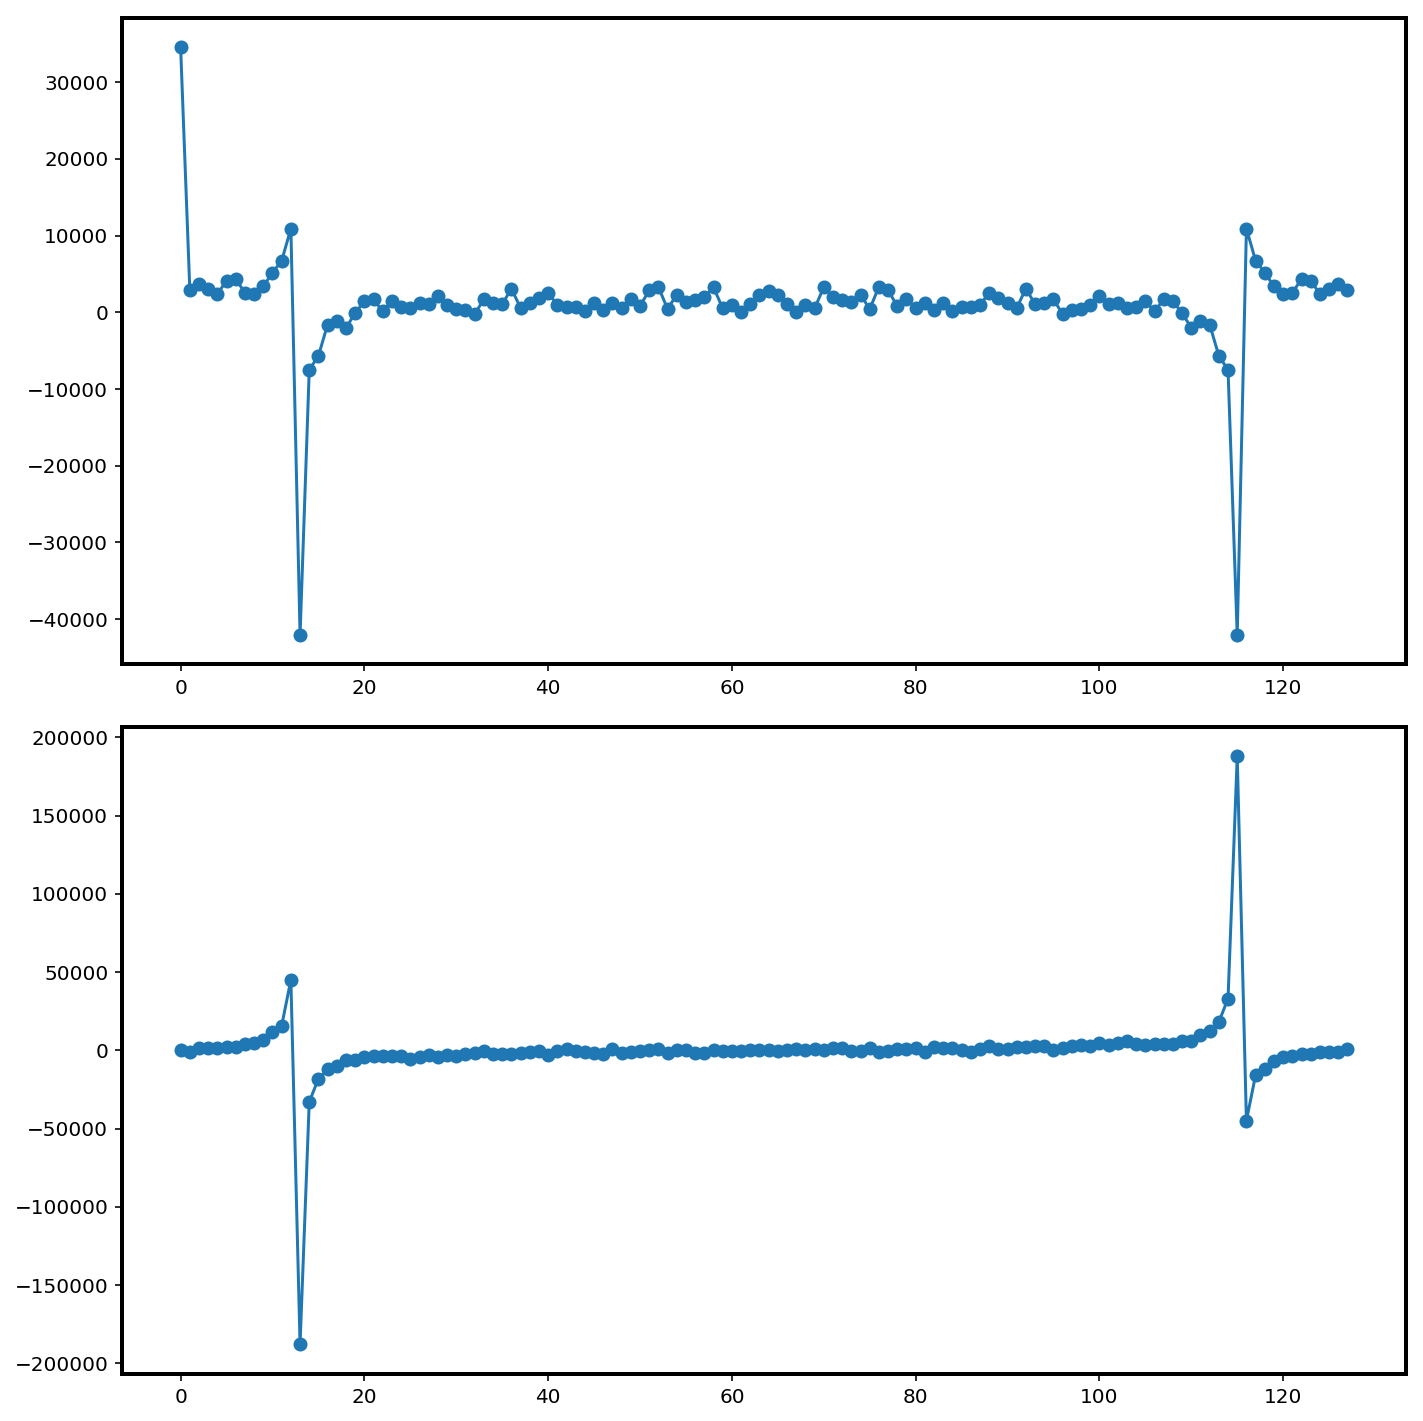

In [86]:
N = 2**7
numpy_fft = np.fft.fft(data[0][:N])
power = np.abs(numpy_fft)**2
plt.figure(figsize = (8, 8))
plt.plot(power, 'k-o')

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(numpy_fft.real, '-o')
ax2.plot(numpy_fft.imag, '-o')

plt.tight_layout()

# 6.1 The Double Sideband Mixer

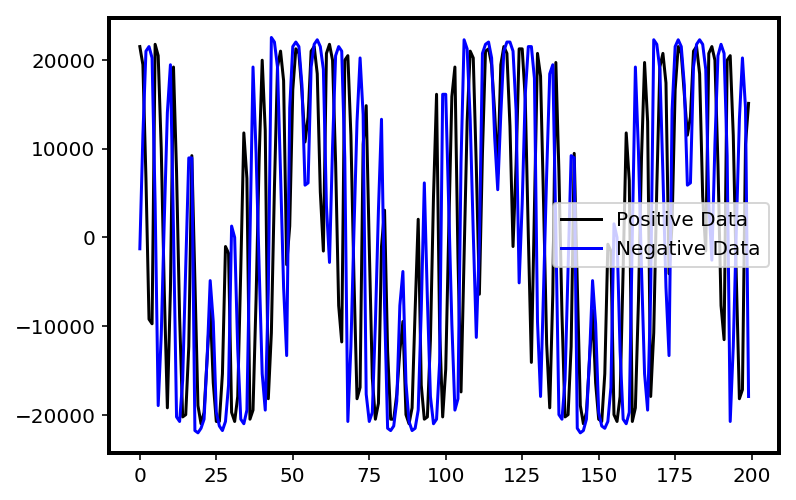

In [87]:
mixer_data1 = np.load('mixer_data1.npy')
mixer_data2 = np.load('mixer_data2.npy')
mixer_data3 = np.load('mixer_data3.npy')

mixer_databelow1 = np.load('mixer_data_below1.npy')
mixer_databelow2 = np.load('mixer_data_below2.npy')
mixer_databelow3 = np.load('mixer_data_below3.npy')

plt.plot(mixer_data1[:200], 'k-', label = 'Positive Data')
plt.plot(mixer_databelow1[:200], 'b-', label = 'Negative Data')
plt.legend()

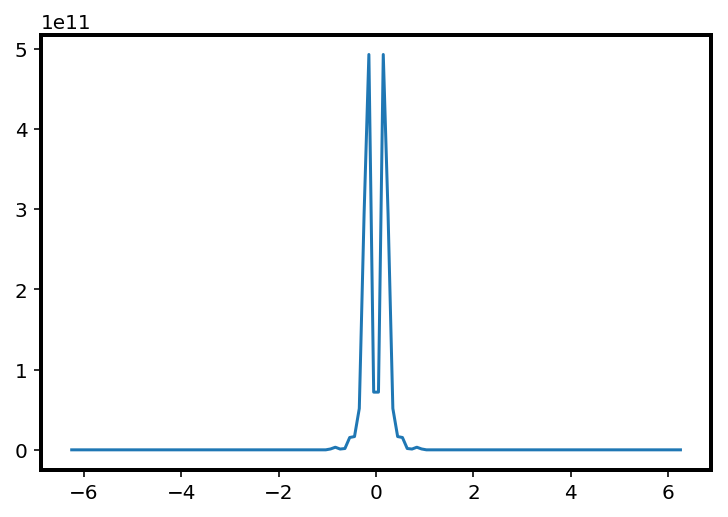

In [88]:
N = 2**7

sampling_freq = 12.5e6

start_time = -(N/2)/sampling_freq
end_time = ((N/2) - 1)/sampling_freq
time_array = np.linspace(start_time, end_time, num = N)

starting_freq = -sampling_freq/2
ending_freq = (sampling_freq/2)*(1-(2/N))
freq_arr = np.linspace(starting_freq, ending_freq, num = N)

mixer_fft = ugradio.dft.dft(mixer_data1[:N], t = time_array, f = freq_arr)
zero_fft = mixer_fft[1] 

#for i in mixer_fft[1]:
#   print(i)

mask = np.zeros(len(mixer_fft[0]/1e6))

for i in range (len(mask)):
    if mixer_fft[0][i]/1e6 > 1 or mixer_fft[0][i]/1e6 < -1:
        mask[i] = 0
    else:
        mask[i] = 1
    
power_mixer = np.abs(mixer_fft[1])**2
filtered_power = mask*power_mixer
plt.plot(mixer_fft[0]/1e6, filtered_power)
plt.show()

idft = ugradio.dft.idft(zero_fft, f = freq_arr)

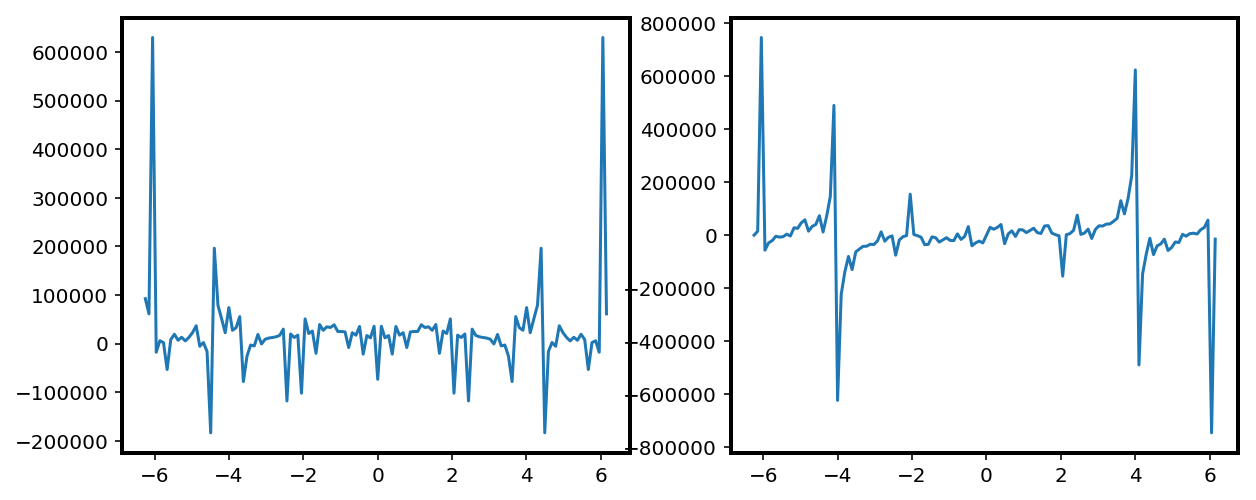

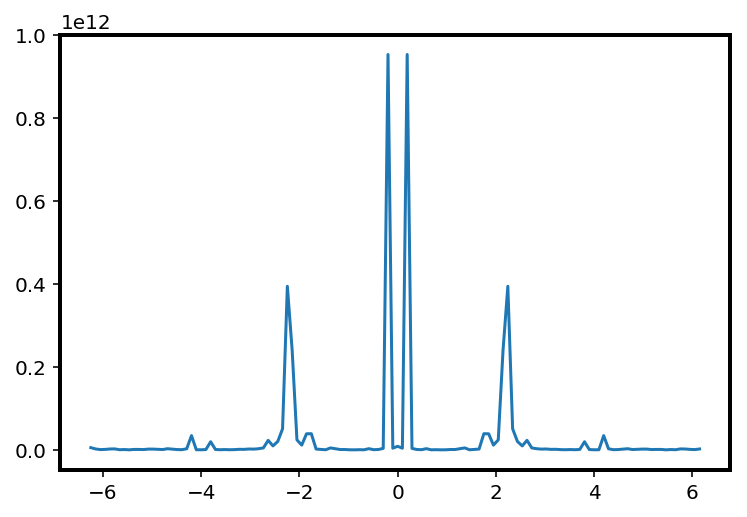

In [89]:
N = 2**7
sampling_freq = 12.5e6

numpy_fft = np.fft.fft(mixer_data1[:N])
freq = np.fft.fftfreq(len(mixer_data1[:N]), d = 1/sampling_freq)

fft_power = np.abs(numpy_fft)**2

fft_real = numpy_fft.real
fft_imag = numpy_fft.imag

fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(np.fft.fftshift(freq)/1e6, fft_real)
ax2.plot(np.fft.fftshift(freq)/1e6, fft_imag)

#print(fft_real[:5])
#print(fft_imag[:5])

plt.figure()
plt.plot(np.fft.fftshift(freq)/1e6, np.fft.fftshift(fft_power))

#for i in fft_power:
#    print(i)

# 6.3 Sideband-Separating Mixer (SSB Mixer)

In [90]:
#ssb_delay = ugradio.pico.capture_data('500mV', divisor=5, dual_mode=True)
#ssb_nodelay = ugradio.pico.capture_data('500mV', divisor=5, dual_mode=True)
#np.save('ssb_ndlower1', ssb_nodelay)

In [91]:
delay_upper = np.load('ssb_d1.npy')
no_delay_upper = np.load('ssb_nd1.npy')

delay_lower = np.load('ssb_dlower1.npy')
no_delay_lower = np.load('ssb_ndlower1.npy')

no_delay_upper_port1 = no_delay_upper[:16000]
no_delay_upper_port2 = no_delay_upper[-16000:] #real

no_delay_lower_port1 = no_delay_lower[:16000]
no_delay_lower_port2 = no_delay_lower[-16000:] #real

def complex(data1, data2):
    
    comp = np.zeros(len(data1), dtype = np.complex_)
    
    for i in range (len(data1)):
        comp[i] = data2[i] + data1[i] * 1j
    return comp

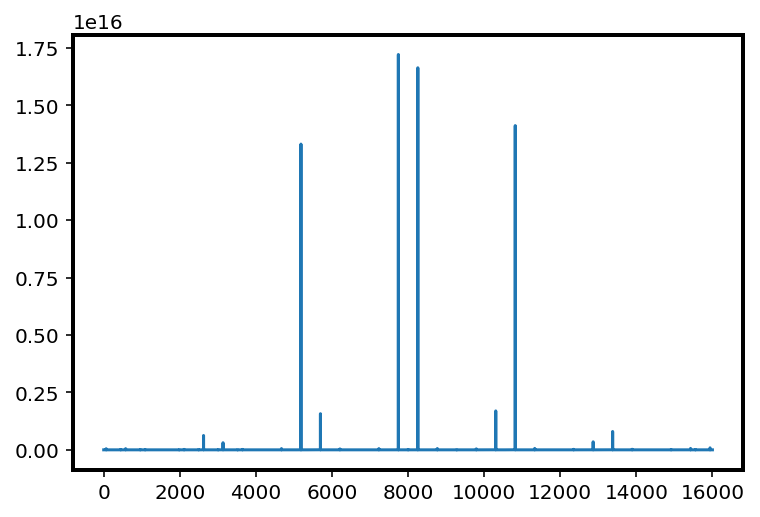

In [92]:
# UPPER NO DELAY PLOTTING

nodelay_complex = complex(no_delay_upper_port1, no_delay_upper_port2)
fft_nodelay = np.fft.fft(nodelay_complex)
power_nodelay = abs(fft_nodelay) ** 2
plt.plot(np.fft.fftshift(power_nodelay))

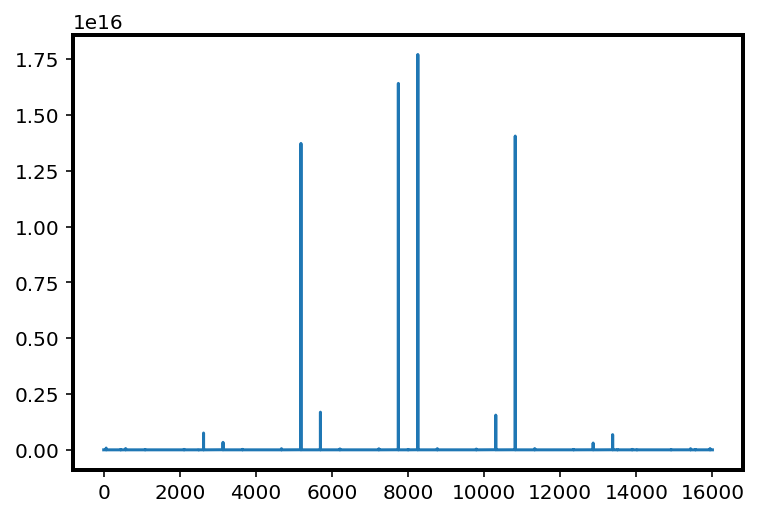

In [93]:
# UPPER DELAY PLOTTING
delay_upper_port1 = delay_upper[:16000] #real
delay_upper_port2 = delay_upper[-16000:] 

delay_lower_port1 = delay_lower[:16000] #real
delay_lower_port2 = delay_lower[-16000:] 

delay_complex = complex(delay_upper_port2, delay_upper_port1)
fft_delay = np.fft.fft(delay_complex)
power_delay = abs(fft_delay) ** 2
plt.plot(np.fft.fftshift(power_delay))

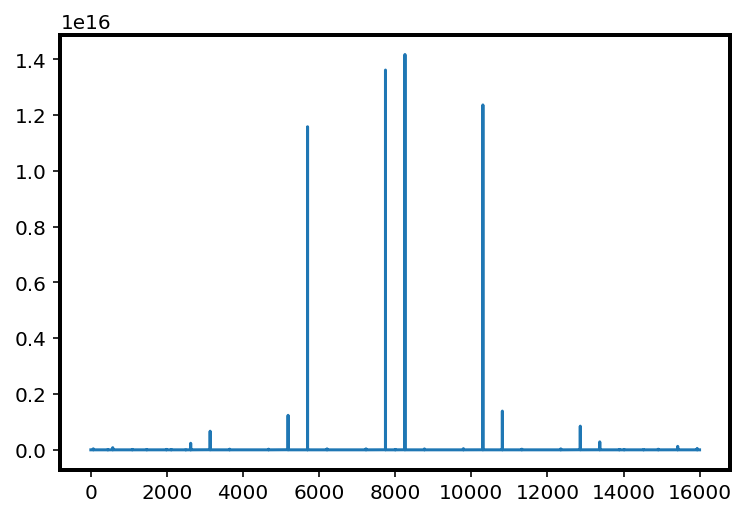

In [94]:
# LOWER NO DELAY PLOTTING

no_delay_complexL = complex(no_delay_lower_port1, no_delay_lower_port2)
fft_nodelayL = np.fft.fft(no_delay_complexL)
power_nodelayL = abs(fft_nodelayL) ** 2
plt.plot(np.fft.fftshift(power_nodelayL))

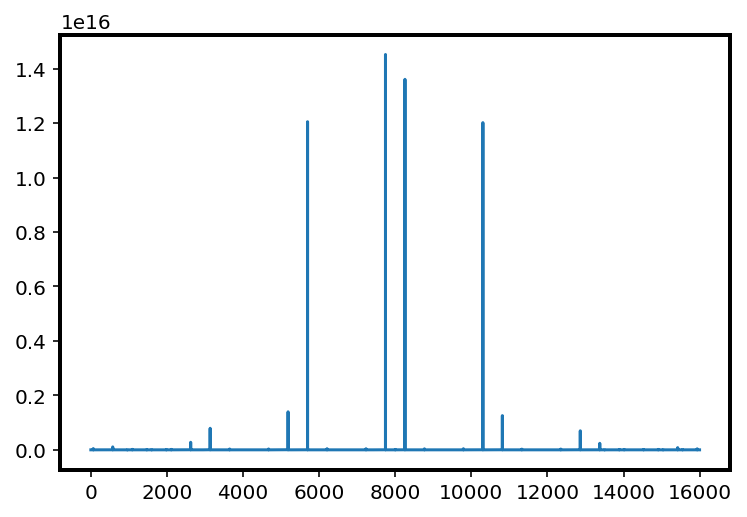

In [95]:
#  LOWER DELAY PLOTTING

delay_complexL = complex(delay_lower_port2, delay_lower_port1)
fft_delayL = np.fft.fft(delay_complexL)
power_delayL = abs(fft_delayL) ** 2
plt.plot(np.fft.fftshift(power_delayL))

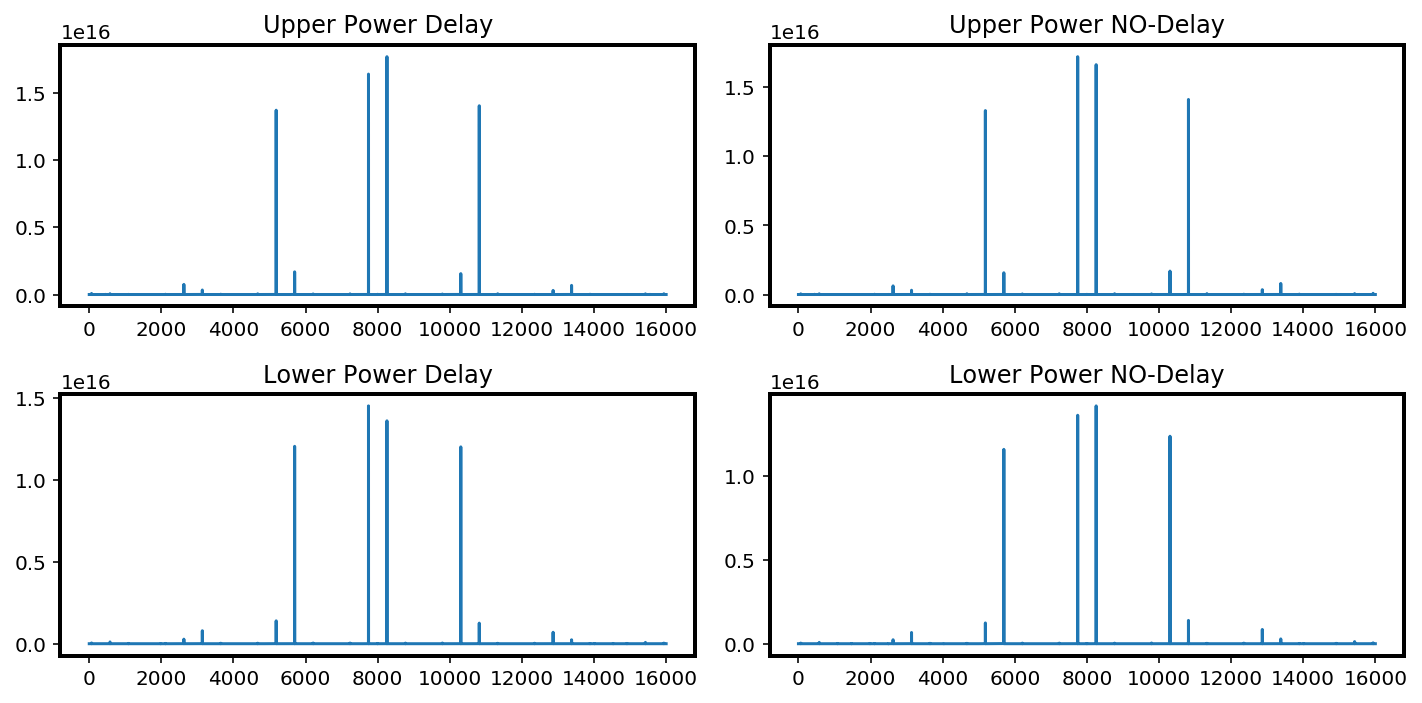

In [96]:
# ALL SSB MIXER PLOTS

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(np.fft.fftshift(power_delay))
ax1.set_title('Upper Power Delay')
ax2.plot(np.fft.fftshift(power_nodelay))
ax2.set_title('Upper Power NO-Delay')
ax3.plot(np.fft.fftshift(power_delayL))
ax3.set_title('Lower Power Delay')
ax4.plot(np.fft.fftshift(power_nodelayL))
ax4.set_title('Lower Power NO-Delay')
plt.tight_layout()

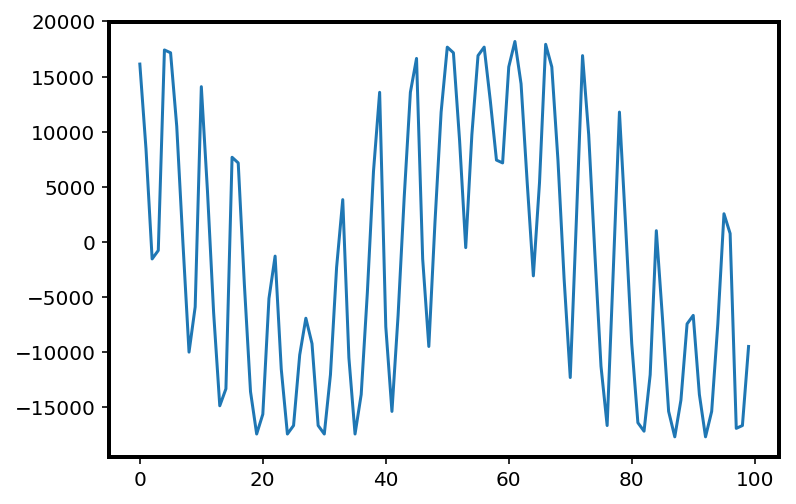

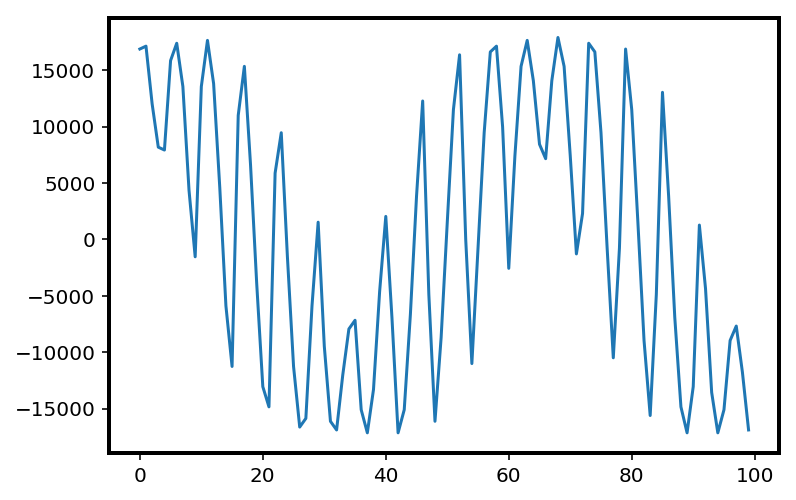

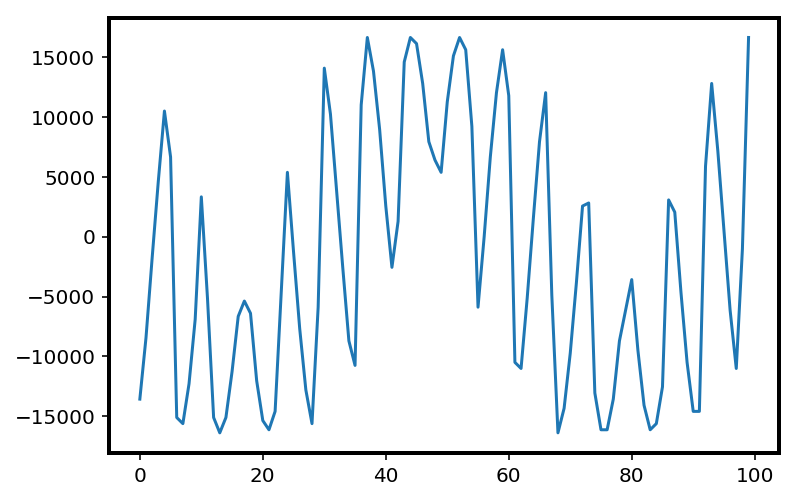

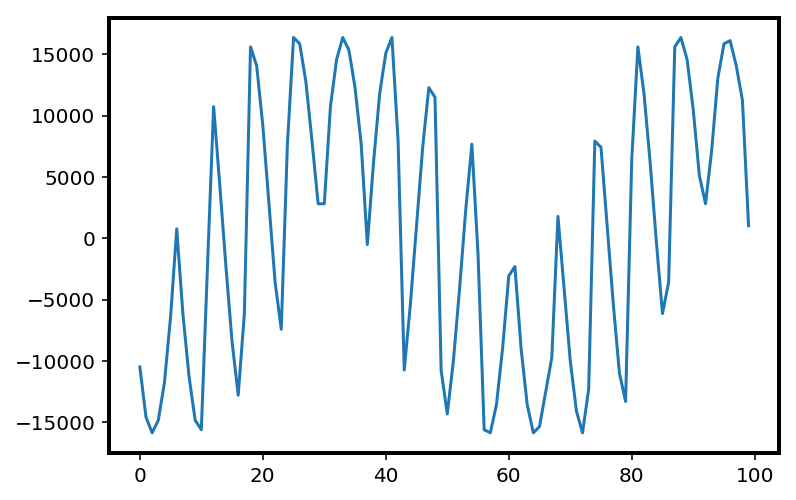

In [97]:
plt.plot(delay_upper[:100])
plt.figure()
plt.plot(no_delay_upper[:100])
plt.figure()
plt.plot(delay_lower[:100])
plt.figure()
plt.plot(no_delay_lower[:100])